# Customer Response Predict & Personality Analysis


## Dataset Description

First give a brief introduction to all attributes in the dataset we use:

* People 
    - ID: Customer's unique identifier
    - Year_Birth: Customer's birth year
    - Education: Customer's education level
    - Marital_Status: Customer's marital status
    - Income: Customer's yearly household income
    - Kidhome: Number of children in customer's household
    - Teenhome: Number of teenagers in customer's household
    - Dt_Customer: Date of customer's enrollment with the company
    - Recency: Number of days since customer's last purchase
    - Complain: 1 if customer complained in the last 2 years, 0 otherwise

* Products
    - MntWines: Amount spent on wine in last 2 years
    - MntFruits: Amount spent on fruits in last 2 years
    - MntMeatProducts: Amount spent on meat in last 2 years
    - MntFishProducts: Amount spent on fish in last 2 years
    - MntSweetProducts: Amount spent on sweets in last 2 years
    - MntGoldProds: Amount spent on gold in last 2 years

* Promotion
    - NumDealsPurchases: Number of purchases made with a discount
    - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    - **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

* Place
    - NumWebPurchases: Number of purchases made through the company’s web site
    - NumCatalogPurchases: Number of purchases made using a catalogue
    - NumStorePurchases: Number of purchases made directly in stores
    - NumWebVisitsMonth: Number of visits to company’s web site in the last month


## Tasks Description

This dataset gives **2240** different customers basic information, their product purchasing preferences as well as their reactions to some marketing compaigns. I want to perform 2 tasks on this dataset:

1) **Supervised Learning Task - Predict Response:** As the data description says, the column 'Response' stands for if certian customer accepted the offer in the last campaign. So the question is **whether we can use some customers' responses to this compaign to predict someone else's reactions** ? If we can achieve this, a business could promote the compaign to customers that are more likely to accept the offer, which could help it make more efficient marketing plan.   

2) **Unsupervised Learning Task - Customer Personality Segmentation:** This dataset also gives us some information about customers(Including their basic information and purchasing preference). So we could perform **Customer Personality Analysis** to help find a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to make proper market plans, like modifying and promoting products for different customers according to the specific needs, behaviors and concerns.


But before doing the tasks above, some **data preprocessing** work need to be done. Also, we need to do some **exporatory data analysis(EDA)** to help people better understand the dataset. 

## Notebook Content 

### 1. [Data Preprocessing](#DP)

### 2. Exploratory Data Analysis
* **2.1 [Univariate Analysis](#UA)**
* **2.2 [Bivriate Analysis](#BA)**
* **2.3 [Multivriate Analysis](#MA)**

### 3. Feature Selection & Dimension Reduction
* **3.1 [Feature Selection by Random Forest](#FS)**
* **3.2 [PCA](#PCA)**

### 4. Supervised Task - Predict Response
* **4.1 [Logistic Regression](#LR)**
* **4.2 [Boosting Tree¶](#BT)**
* **4.3 [SVM](#SVM)**
* **4.4 [Nerual Network](#NN)**
* **4.5 [Final Model Performance](#FMT)**

### 5. Unsupervised Task - Customer Personality Segmentation
* **5.1 [Feature Engineering for Clustering Algorithm](#FECA)**
* **5.2 [K-Means](#Kmeans)**
* **5.3 [Guassian Mixture Model](#GMM)**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime 
import seaborn as sns
import scipy
import random
import math
from scipy.stats.mstats import winsorize
from tqdm import tqdm

from sklearn import preprocessing
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn import svm

import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [2]:
data = pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv',sep='\t')
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### First Observation:
* There are 3 'object type' variables - ['Education', 'Marital_Status', 'Dt_Customer'], and the rest are all numerical Vs**


## Data Preprocess<a name='DP'></a>

In [4]:
# Check NUll data
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**There are 24 NA rows in 'Income' columns, so we fill these NA with the average income of all people**

In [5]:
data['Income'].fillna(np.mean(data['Income']), inplace=True)
# Change unit to 1K $ 
data['Income'] = data['Income'] / 1000 

In [6]:
pd.DataFrame(data.nunique()).sort_values(0).rename( {0: 'Unique Values'}, axis=1)

Unique Values
Z_Revenue                        1
Z_CostContact                    1
Response                         2
AcceptedCmp3                     2
AcceptedCmp4                     2
AcceptedCmp2                     2
Complain                         2
AcceptedCmp1                     2
AcceptedCmp5                     2
Kidhome                          3
Teenhome                         3
Education                        5
Marital_Status                   8
NumCatalogPurchases             14
NumStorePurchases               14
NumDealsPurchases               15
NumWebPurchases                 15
NumWebVisitsMonth               16
Year_Birth                      59
Recency                        100
MntFruits                      158
MntSweetProducts               177
MntFishProducts                182
MntGoldProds                   213
MntMeatProducts                558
Dt_Customer                    663
MntWines                       776
Income                        1975
ID                            2240

### Observations:
* Z_Revenue & Z_CostContact have **Constant** value, which don't provide any information so we should drop them.
* Response - AcceptedCmp5 are all **Binary Variables**.
* Marital_Status & Education can be seen as **Categorical Variable**.

* Kidhome & Teenhome are **Discrete Ordinal Variables**, for which have clear orders but not many different values.
* The rest 16 variables can be seen as **Continuous Ordinal Variables**.

In [7]:
# Drop constant columns - Z_CostContact & Z_Revenue
data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True) 
# User ID & Regist Date is useless for classification & Segmentation task
data.drop(['ID', 'Dt_Customer'], axis=1, inplace=True) 

In [8]:
# Change Year_Birth to Age (Age is more informative)
data['Age'] = 2021 - data.Year_Birth.to_numpy()
data.drop('Year_Birth', axis=1, inplace=True)

In [9]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

* There are too many maritial status, which might affects the efficiency of classification algorithms.
* Alone, Adsurd and YOLO are all specific situations of 'Single', so replace all of them with 'Single'

In [10]:
data['Marital_Status'] = data['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single')

In [11]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

* There 5 different values of Education, but according to 'Three Cycle System' from the European Higher Education Area, **2n Cycle** is equal to **Master degree**.
* **Graduation** degree is the same as **Bachelor** in Europe. Thus, we adjust the education level of all customers.

In [12]:
data['Education'].replace(['2n Cycle', 'Graduation'], ['Master', 'Bachelor'], inplace=True)

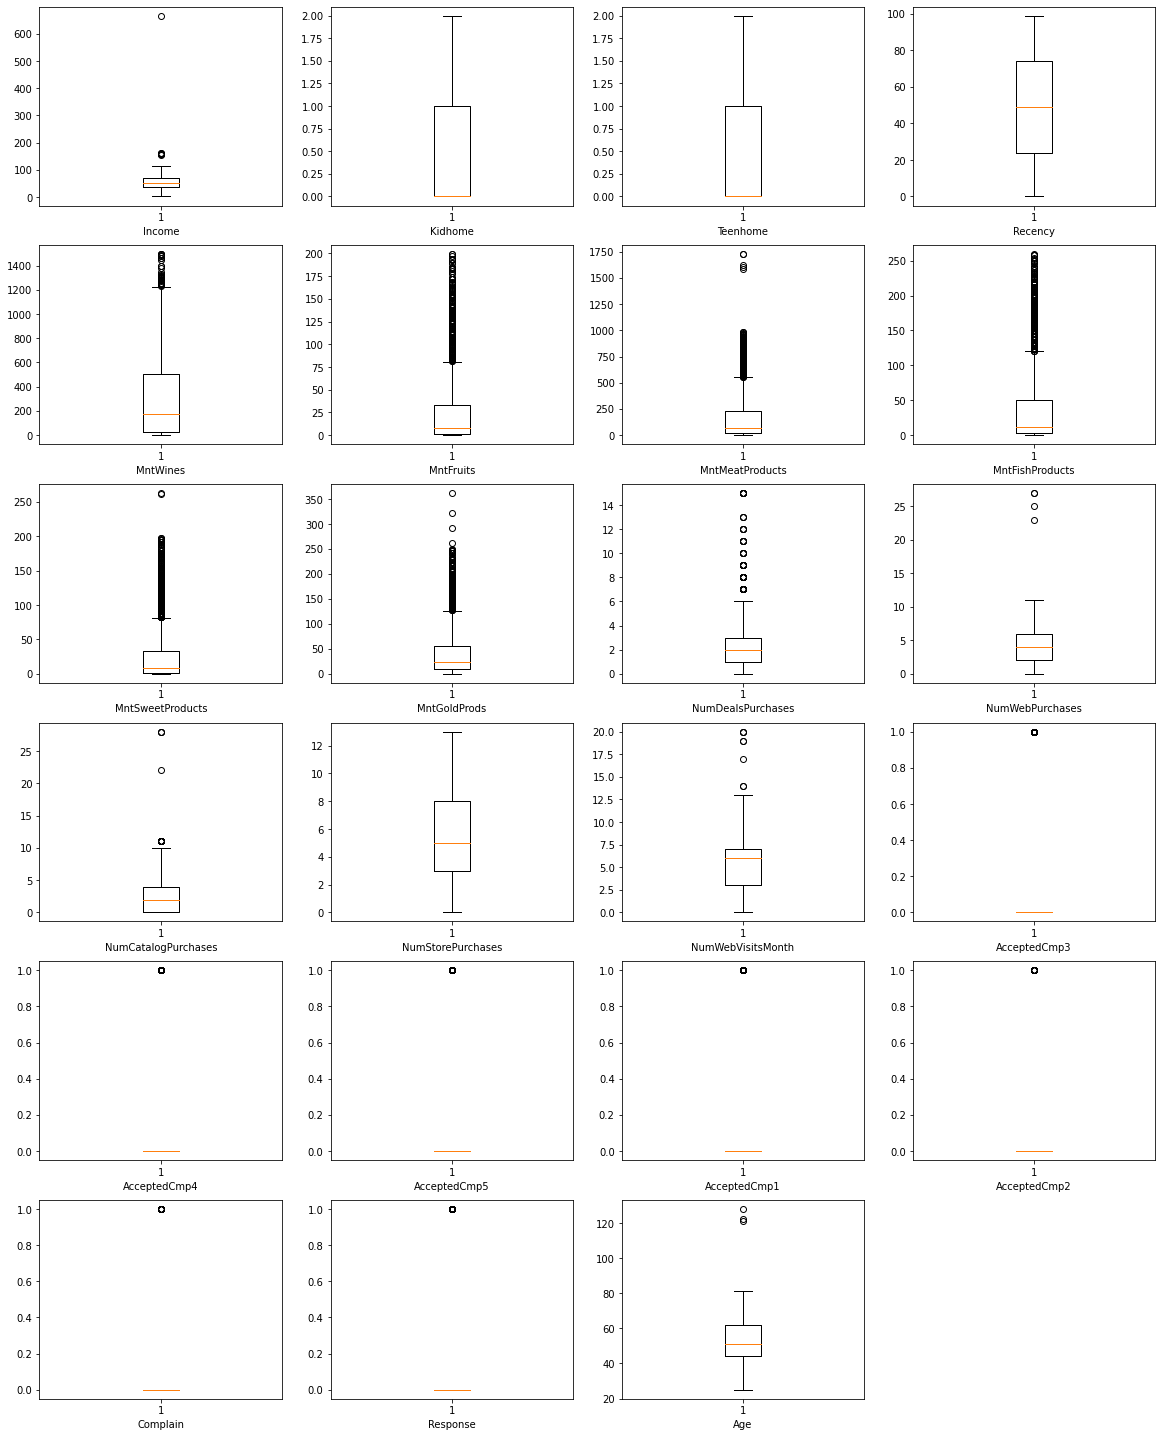

In [13]:
# plot all numerical columns (14)
num_coln = data.select_dtypes(include=np.number).columns.tolist()
bins=10
j=1
fig = plt.figure(figsize = (20, 30))
for i in num_coln:
    plt.subplot(7,4,j)
    plt.boxplot(data[i])
    j=j+1
    plt.xlabel(i)
    # plt.legend(i)
plt.show()


* We can see some clear outliers in **Income** and **Age**. We will remove the rows where the Income is greater than 200K and birth year is less than 1920.


* For other columns, we cannot blindly remove these outliers as there could be cases where the requirement for these products is high by the user. Maybe the consumer is hosting a party or an event or is more comfortable getting his products from a particular channel.


In [14]:
data.drop(data[(data['Income']>200)|(data['Age']>100)].index,inplace=True)

## Exploratory Data Analysis

* Univariate Analysis
* Bivriate Analysis
    * 2 categorical variables
    * 1 categorical V + 1 numerical V
* Multivriate Analysis (Relationships between 2 numerical Vs)

### Univariate Analysis<a name='UA'></a>

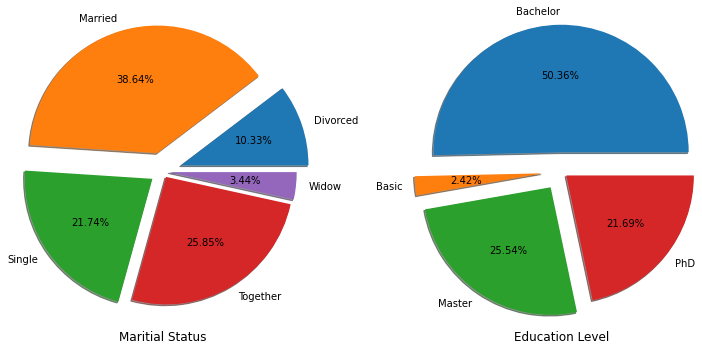

In [15]:
# Maritial Status & Education levels
cust_count=data.groupby("Marital_Status").count()['Age']
label=data.groupby('Marital_Status').count()['Age'].index
fig, ax = plt.subplots(1, 2, figsize = (10, 12))
ax[0].pie(cust_count, labels=label, shadow=True, autopct='%1.2f%%',radius=2,explode=[0.3,0.3,0.2,0.1,0.1])
ax[0].set_title('Maritial Status', y=-0.6)

cust_count = data.groupby("Education").count()['Age']
label = data.groupby('Education').count()['Age'].index
ax[1].pie(cust_count, labels=label, shadow=True, autopct='%1.2f%%',radius=2,explode=[0.3,0.3,0.3,0.1])
ax[1].set_title('Education Level', y=-0.6)
plt.subplots_adjust(wspace = 1.5, hspace =0)
plt.show()

* These 2 figures give a quick look of the customer distribution, we could see the most our customer(64%) are in relationships(Married or Together) and most(97%) are at least bachelor degrees.

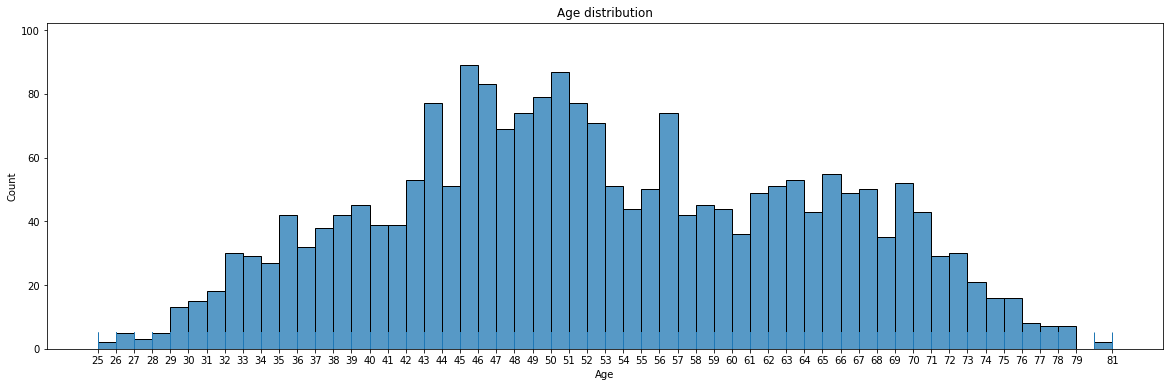

In [16]:
# Age Range
plt.figure(figsize=(20, 6))
plt.title('Age distribution')
ax = sns.histplot(data['Age'].sort_values(), bins=56)
sns.rugplot(data=data['Age'], height=.05)
plt.xticks(np.linspace(data['Age'].min(), data['Age'].max(), 56, dtype=int, endpoint = True))
plt.show()

* The age of the customers are mainly clustering in **40s or 60s**, the young people(under 30) are very few. 

* These people are at their middle ages or old ages, so their family condition should be further taken care of.

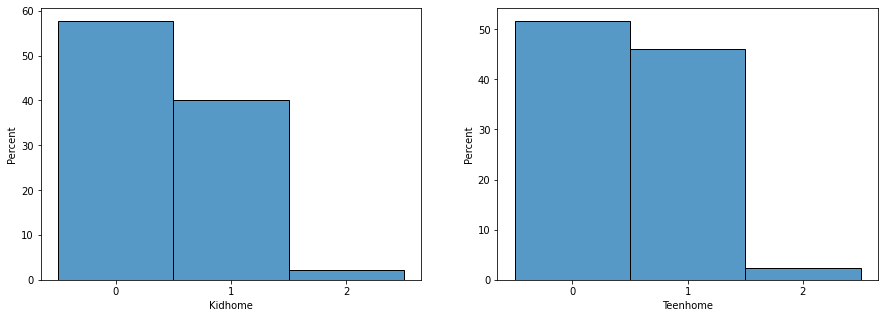

In [17]:
# Kid Home & Teen Home
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=data, x='Kidhome', stat="percent", discrete=True)
plt.xticks([0, 1, 2])

plt.subplot(122)
sns.histplot(data=data, x='Teenhome', stat="percent",discrete=True)
plt.xticks([0, 1, 2])
plt.show()

* Most customers have 1 kid or 0 kid at home, very few have 2 kids, and no one have kids over 2.

* The number of teens at home is very similar to kid num. 

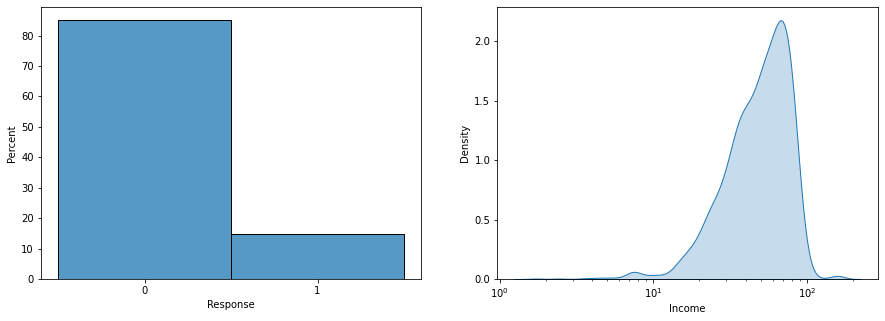

In [18]:
# Response dist. & Imcome Range
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.histplot(data=data, x='Response', stat="percent", discrete=True)
plt.xticks([0, 1])

plt.subplot(122)
# Income Range
sns.kdeplot(data=data, x="Income", shade=True, log_scale=True)
plt.show()

* According to Response, this is an **unbalanced dataset**, over 80% customers say no to the last compaign. So we should take care and use more comprehensive and accurate indicators(like F-1 or MCC) to evaluate the classification models.

* Most customers income levels are in the range [10K, 100K] per year.

### Bivriate Analysis<a name='BA'></a>

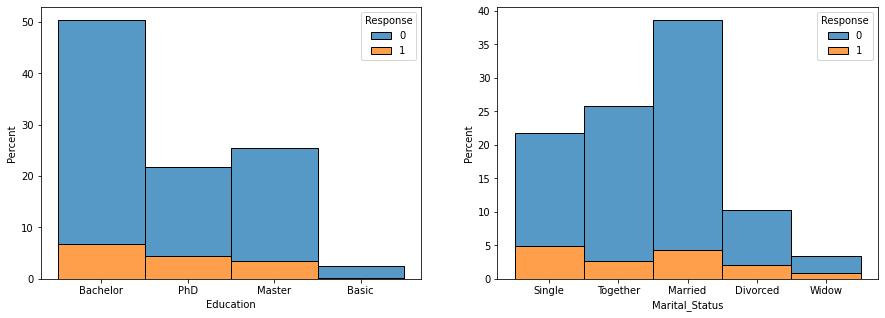

In [19]:
# Education & Response
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=data, x="Education", hue="Response", multiple="stack", stat="percent")

# Marital_Status & Response
plt.subplot(122)
sns.histplot(data=data, x="Marital_Status", hue="Response",stat="percent", multiple="stack")
plt.show()

* From the left figure, we can find that the **compaign acceptance rate** in high education groups(Master and PhD) are higher than that in low education groups.

* From the right plot, we find that the **single people** tend to say yes to this compaign. 

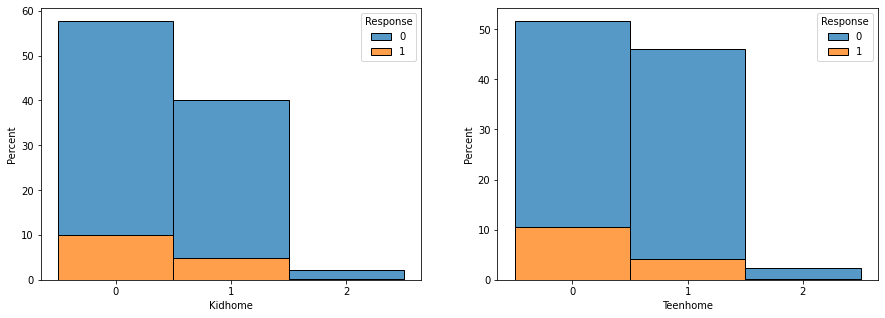

In [20]:
# Kid Home & Response
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=data, x="Kidhome", hue="Response", multiple="stack", stat="percent", discrete=True)
plt.xticks([0, 1, 2])
# Teen Home & Response
plt.subplot(122)
sns.histplot(data=data, x="Teenhome", hue="Response", multiple="stack", stat="percent", discrete=True)
plt.xticks([0, 1, 2])
plt.show()

* It seems that customers with no kids and no teens at home are more likely to accept the offer in this compaign.

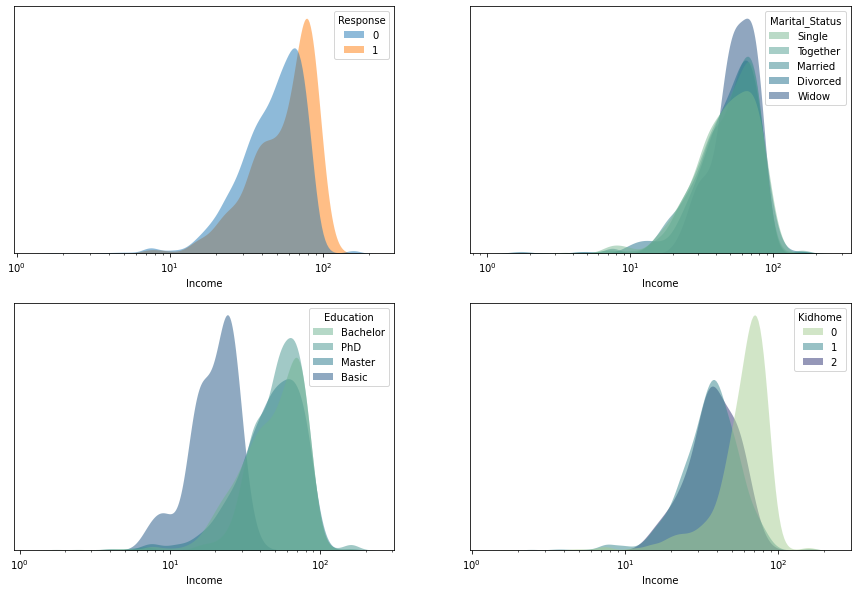

In [21]:
# Income (by Response/Marital_Status/Education/Kidhome)
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.kdeplot(
   data=data, x="Income", hue="Response", log_scale= True,
   fill=True, common_norm=False,
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) # Set y invisible
plt.xlabel('Income')

# segment by Marital_Status
plt.subplot(222)
sns.kdeplot(
   data=data, x="Income", hue="Marital_Status", log_scale= True,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) 

# segment by Education
plt.subplot(223)
sns.kdeplot(
   data=data, x="Income", hue="Education", log_scale= True,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) 

# segment by Kidhome
plt.subplot(224)
sns.kdeplot(
   data=data, x="Income", hue="Kidhome", log_scale= True,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False)

#### The plots about Income VS 4  different Discrete Variables give us some interesting information.
     1) The high income groups have larger possibility to accept offer in the compaign, as we can see the income distributions of people who say 'yes' and 'no' have a slight difference.
     2) There are no clear income difference between people with different maritial status.
     3) Customers only with basic education have significantly lower income, while bachelors, masters, and PhDs do not have clear difference in income level. 
     4) It seems that customers who don't have any kids at home have higher income levels.

### Multivariate Analysis<a name='MA'></a>

In [22]:
# Check all Vriable Type
pd.DataFrame(data.nunique()).sort_values(0).rename( {0: 'Unique Values'}, axis=1)

Unique Values
Complain                         2
AcceptedCmp2                     2
AcceptedCmp1                     2
AcceptedCmp5                     2
AcceptedCmp4                     2
AcceptedCmp3                     2
Response                         2
Kidhome                          3
Teenhome                         3
Education                        4
Marital_Status                   5
NumStorePurchases               14
NumCatalogPurchases             14
NumDealsPurchases               15
NumWebPurchases                 15
NumWebVisitsMonth               16
Age                             56
Recency                        100
MntFruits                      158
MntSweetProducts               177
MntFishProducts                182
MntGoldProds                   213
MntMeatProducts                557
MntWines                       775
Income                        1971

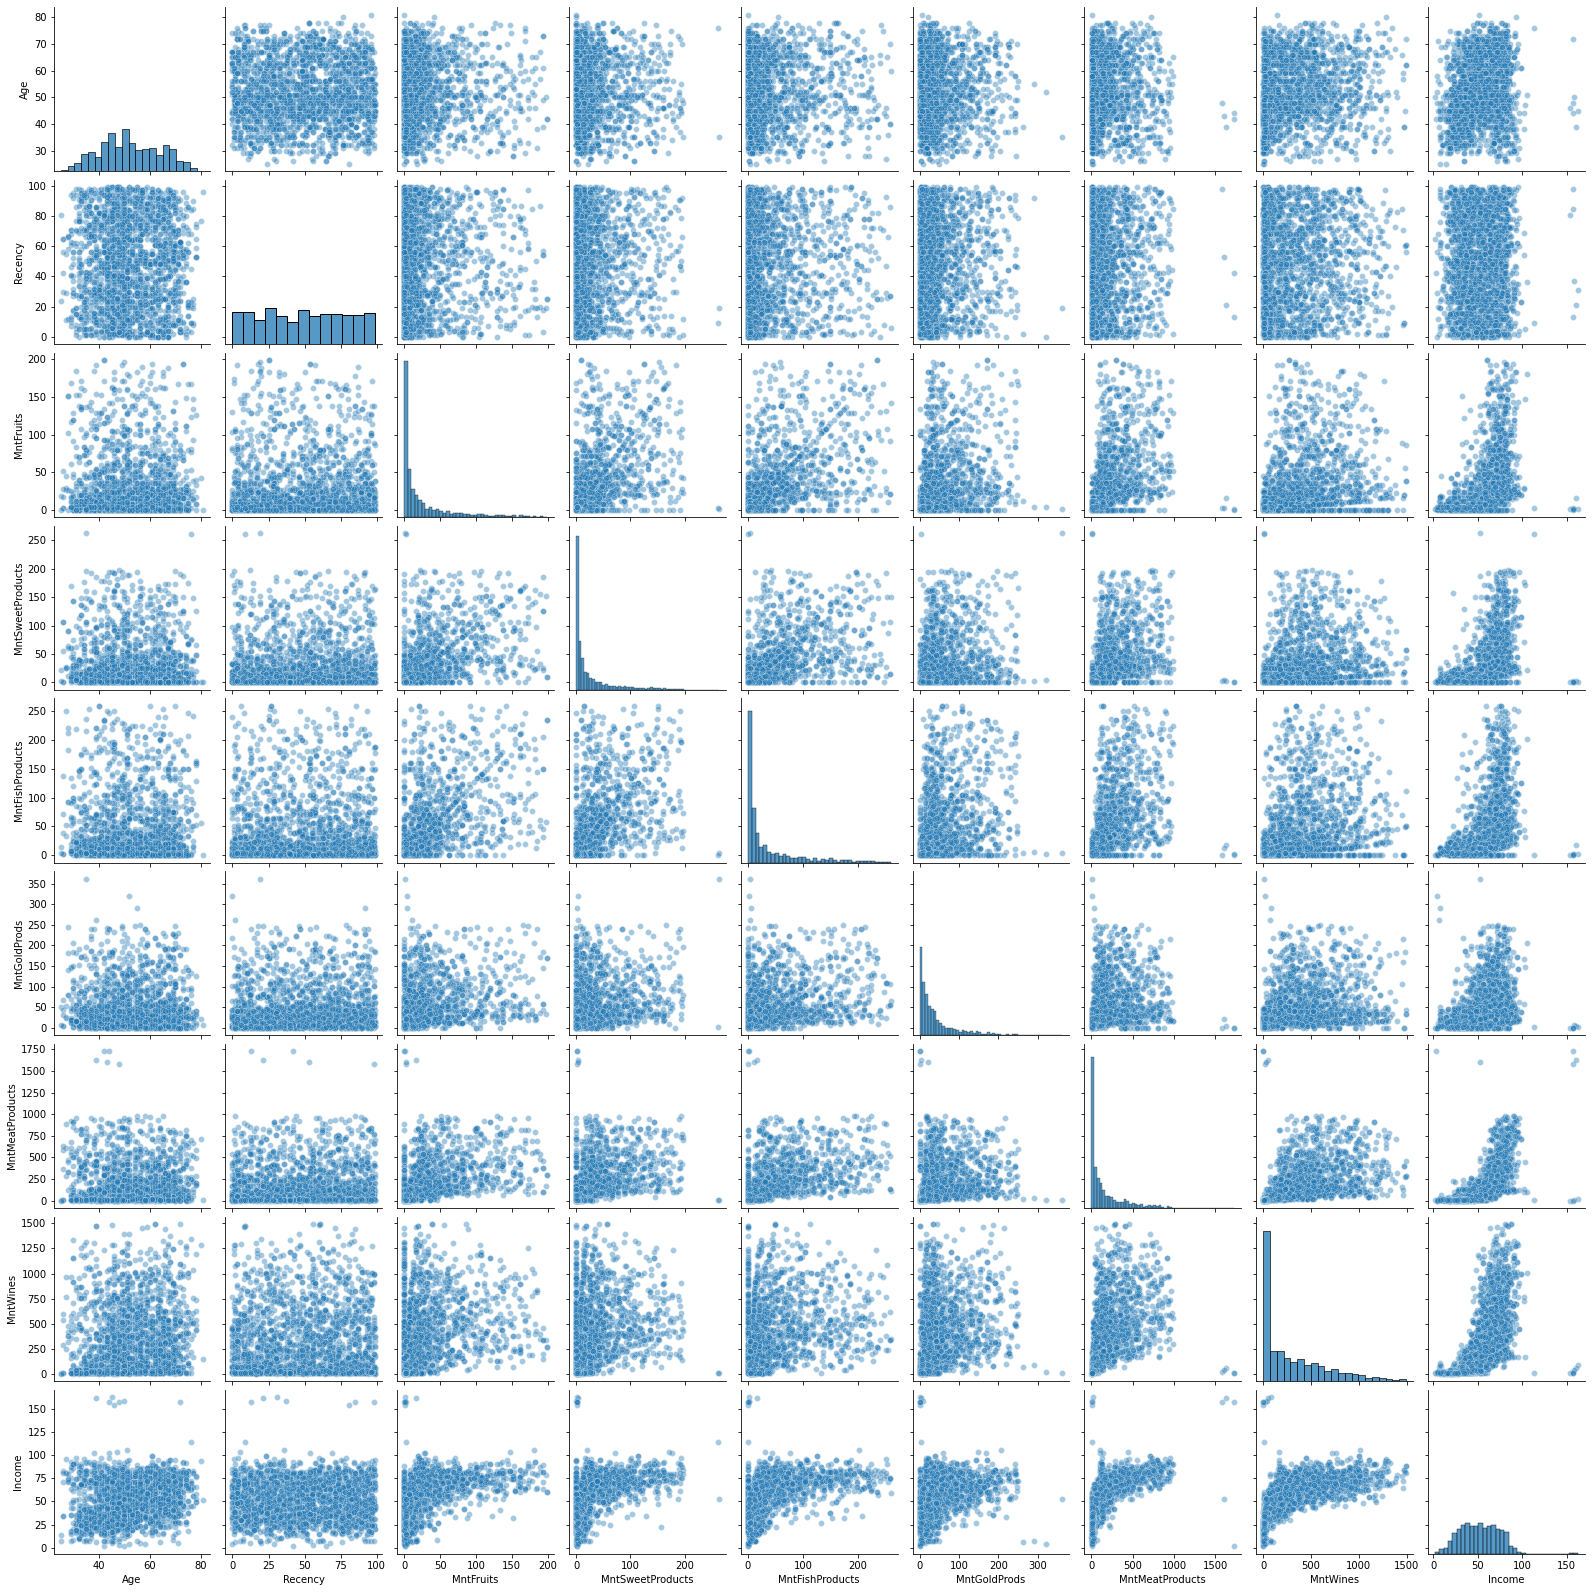

In [23]:
# Choose features have over 50 different values
NUMERICAL_FEATURES = ['Age', 'Recency', 'MntFruits', 
                      'MntSweetProducts', 'MntFishProducts', 'MntGoldProds', 
                      'MntMeatProducts', 'MntWines', 'Income']

sns.pairplot(data=data[NUMERICAL_FEATURES], 
             kind='scatter', plot_kws={'alpha':0.4})
plt.show()

* From the plot above, we could see tha these numerical variables do not have clear linear trend between each other.
* While **Income** might have **log relationships** with these product purchasing amount (say, Mntfruit, MntSweetProducts and etc.).

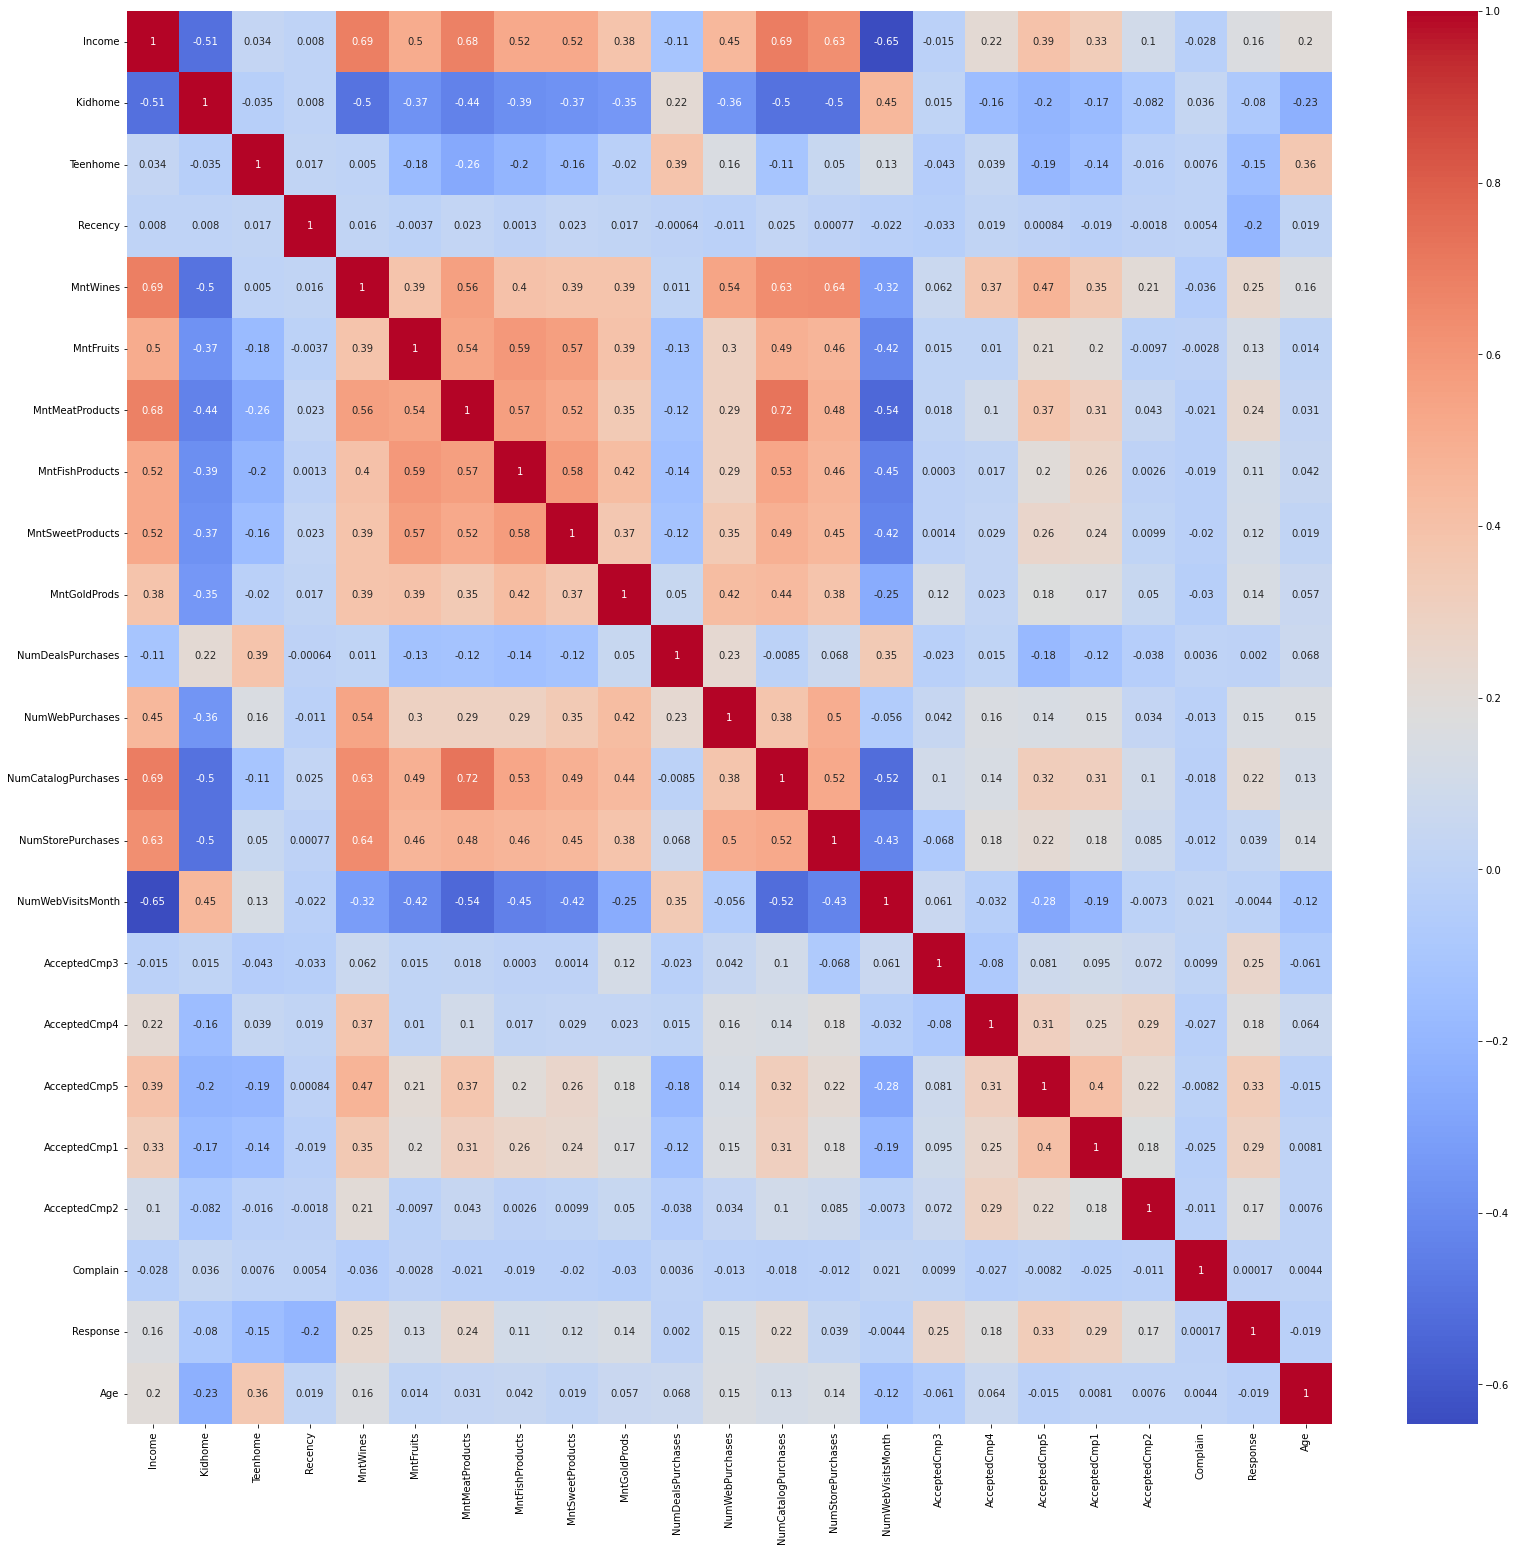

In [24]:
# Heat map among all numerical variables
cor = data.corr()
plt.figure(figsize = (27,26))
sns.heatmap(cor, annot = True, cmap = 'coolwarm')
plt.show()

## Preparations for Prediction Models

In [25]:
# Education have orders, so we change Basic-Phd to scale 0-3
df_cluster = data.copy() # leave for clustering 

data['Education'] = data['Education'].replace(['Basic'], 0)
data['Education'] = data['Education'].replace(['Bachelor'], 1)
data['Education'] = data['Education'].replace(['Master'], 2)
data['Education'] = data['Education'].replace(['PhD'], 3)

# Change Marital_Status to dummies
data = pd.get_dummies(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                2236 non-null   int64  
 1   Income                   2236 non-null   float64
 2   Kidhome                  2236 non-null   int64  
 3   Teenhome                 2236 non-null   int64  
 4   Recency                  2236 non-null   int64  
 5   MntWines                 2236 non-null   int64  
 6   MntFruits                2236 non-null   int64  
 7   MntMeatProducts          2236 non-null   int64  
 8   MntFishProducts          2236 non-null   int64  
 9   MntSweetProducts         2236 non-null   int64  
 10  MntGoldProds             2236 non-null   int64  
 11  NumDealsPurchases        2236 non-null   int64  
 12  NumWebPurchases          2236 non-null   int64  
 13  NumCatalogPurchases      2236 non-null   int64  
 14  NumStorePurchases       

## Feature Selection by Random Forest <a name='FS'></a>

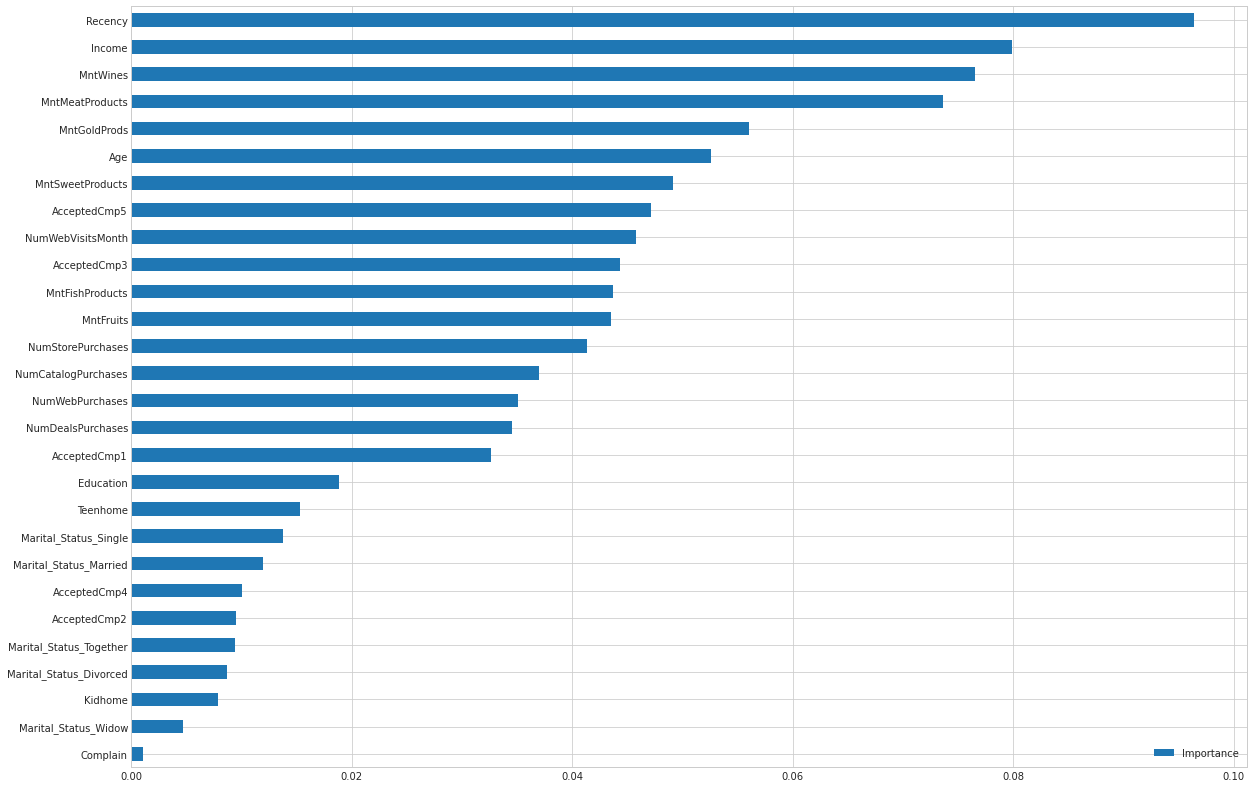

In [26]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(data.drop('Response', axis=1), data['Response'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=data.drop('Response', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

In [27]:
# Choose Features (Keep 90% Importance ration)
feature_nums = 18
ascend_import = importance.sort_values(by='Importance', ascending=False)
all_info = ascend_import['Importance'].iloc[:feature_nums].sum()
all_choose_features = list(ascend_import.iloc[:feature_nums].index)

print('Names: ', all_choose_features)
print('Importance Raio: ', all_info)

Names:  ['Recency', 'Income', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'Age', 'MntSweetProducts', 'AcceptedCmp5', 'NumWebVisitsMonth', 'AcceptedCmp3', 'MntFishProducts', 'MntFruits', 'NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases', 'AcceptedCmp1', 'Education']
Importance Raio:  0.9078124675440433


## PCA Transformation<a name='PCA'></a>

PCA data shape:  (2236, 19)


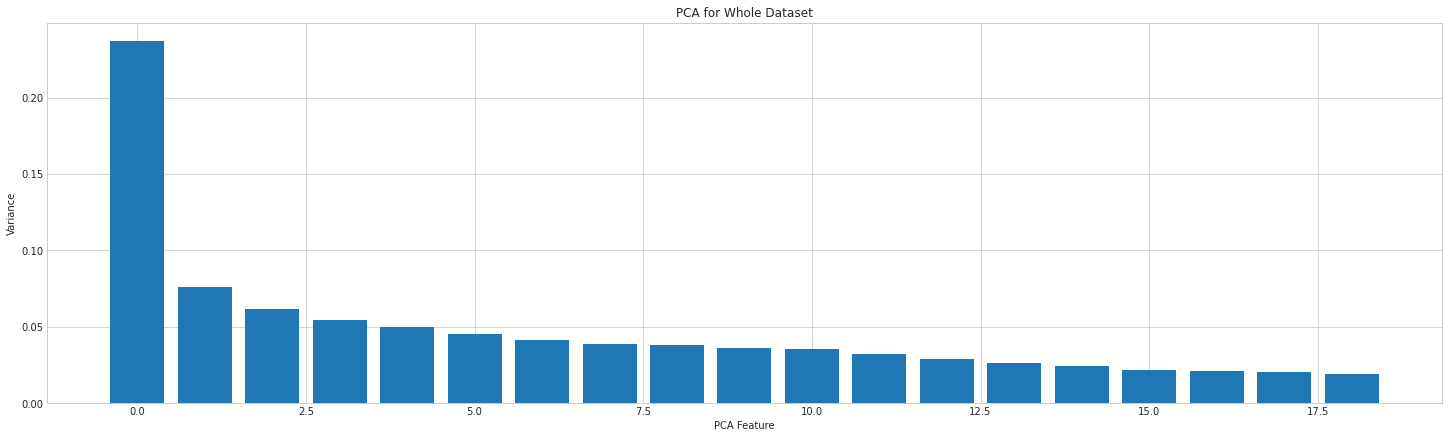

In [28]:
from sklearn.decomposition import PCA
# Calculating PCA for both datasets, and graphing the Variance for each feature, per dataset
std_scale = preprocessing.StandardScaler().fit(data.drop('Response', axis=1))
X = std_scale.transform(data.drop('Response', axis=1))

pca1 = PCA(0.90, whiten=True) # Keep 90% information
fit1 = pca1.fit(X)

# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7)) 
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Whole Dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_);

# Get pca transformed data
pca_data = pca1.transform(X)
pca_data = np.array(pca_data)
print('PCA data shape: ', pca_data.shape)

## Choose Data Source

* 0: Raw data
* 1: Feature Selection
* 2: PCA

In [29]:
# This list is used to store model performance of different datasets(raw, feature selection, pca)
'''
!!! Do NOT rerun this blk, when choosing different dataset, 

because this list is used to store the performances of different models.
'''
perf_df_lst = [None, None, None] 

In [30]:
# Choose dataset
dataset_num = 1

# 0: Raw Data; 1: Feature Selection Data; 2: PCA Data
all_datasets = [data.drop('Response', axis=1).values, data[all_choose_features].values, pca_data]

# Choose data
final_data = all_datasets[dataset_num]

## Supervised Learning Task - Predict Response

### Data Preparation for Classification Models

In [31]:
# Split the dataset
from imblearn.over_sampling import SMOTE
from collections import  Counter

x_train = final_data[:2000]
y_train = data['Response'].values[:2000]
x_test = final_data[2000:]
y_test = data['Response'].values[2000:]

print('Train: ', len(x_train))
print('Test: ',  len(x_test))
print('N/P Sample: ', Counter(y_train))

# SMOTE Samples
sm = SMOTE(random_state=2)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

print('Train: ', len(x_train))
print('Test: ',  len(x_test))
print('N/P Sample: ', Counter(y_train))

# MCC scorer function
mcc_scorer = make_scorer(matthews_corrcoef)

Train:  2000
Test:  236
N/P Sample:  Counter({0: 1698, 1: 302})
Train:  3396
Test:  236
N/P Sample:  Counter({1: 1698, 0: 1698})


#### Why SMOTE (Dataset Extended Trick) & MCC Scorer (Matthews correlation coefficient) ?

* As we find in the data exploration phase, this is an unbalanced dataset(over 80% say no to the compaign). So the models are easy to learn some traits about negative samples, but it might be hard to get from positive samples.


* While **SMOTE** alleviate the problem by offering us more positive training samples.


* At the same time, **MCC scorer** takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. In this learning task, MCC is a more efficient measure than accuracy in test period, because there are only a few positive samples in the test set.

### Logistic Regression<a name='LR'></a>

In [32]:
LR = LogisticRegression()

# K-Fold Validation
kfold = 8

# ACC Score
LR_cv_results_acc = cross_val_score(LR, x_train, y_train, cv=kfold, scoring='accuracy')   
msg = "%s k-fold ACC: %f (%f)" % ('LR', LR_cv_results_acc.mean(), LR_cv_results_acc.std())
print(msg)
# MCC Score
LR_cv_results_mcc = cross_val_score(LR, x_train, y_train, cv=kfold, scoring=mcc_scorer)   
msg = "%s k-fold MCC: %f (%f)" % ('LR', LR_cv_results_mcc.mean(), LR_cv_results_mcc.std())
print(msg)

LR k-fold ACC: nan (nan)
LR k-fold MCC: nan (nan)


### Boosting Tree<a name='BT'></a>

In [33]:
# Validation for Boosting Tree
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=160, random_state=1)  
# ACC Score
BT_cv_results_acc = cross_val_score(clf, x_train, y_train, cv=kfold, scoring='accuracy')   
msg = "k-fold ACC: %f (%f)" % (BT_cv_results_acc.mean(), BT_cv_results_acc.std())
print(msg)

# MCC Score
BT_cv_results_mcc = cross_val_score(clf, x_train, y_train, cv=kfold, scoring=mcc_scorer)   
msg = "k-fold MCC: %f (%f)" % (BT_cv_results_mcc.mean(), BT_cv_results_mcc.std())
print(msg)

k-fold ACC: 0.904064 (0.097477)
k-fold MCC: 0.820835 (0.171382)


### SVM<a name='SVM'></a>

In [34]:
SVM=svm.SVC(kernel = 'rbf', C = 10, gamma = 0.01)

# ACC Score
svm_cv_results_acc = cross_val_score(SVM, x_train, y_train, cv=kfold, scoring='accuracy')   
msg = "k-fold ACC: %f (%f)" % (svm_cv_results_acc.mean(), svm_cv_results_acc.std())
print(msg)

# MCC Score
svm_cv_results_mcc = cross_val_score(SVM, x_train, y_train, cv=kfold, scoring=mcc_scorer)   
msg = "k-fold MCC: %f (%f)" % (svm_cv_results_mcc.mean(), svm_cv_results_mcc.std())
print(msg)

k-fold ACC: 0.802105 (0.023620)
k-fold MCC: 0.644576 (0.039894)


### Nerual Networks<a name='NN'></a>

In [35]:
# import modules
from keras import models
from keras import layers

x_nn = x_train
y_nn = y_train

In [36]:
# Define the K-fold Cross Validator
kfold_obj = KFold(n_splits=kfold, shuffle=True)
epochs = 150
batch_size = 64
acc_per_fold = []
mcc_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold_obj.split(x_nn, y_nn):
    
    model = models.Sequential()
    # Only use shallow Neural Network
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    # Fit data to model
    history = model.fit(x_nn[train], y_nn[train].reshape(-1, 1),
              batch_size=64,
              epochs=100)

    # Generate generalization metrics
    predictions = model.predict(x_nn[test])
    
    for i in range(len(predictions)):
        if predictions[i] >=0.5:
            predictions[i] = 1
        else:
            predictions[i] = 0
            
    acc_per_fold.append(accuracy_score(predictions, y_nn[test]))
    mcc_per_fold.append(matthews_corrcoef(predictions, y_nn[test]))

    # Increase fold number
    fold_no = fold_no + 1



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
47/47 [==============================] - 1s 2ms/step - loss: 9.2423 - accuracy: 0.4860
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 2.8693 - accuracy: 0.6072
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 1.6229 - accuracy: 0.6537
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 1.1267 - accuracy: 0.6819
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 0.9686 - accuracy: 0.7092
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 0.9526 - accuracy: 0.7055
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 0.8736 - accuracy: 0.7206
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 0.8336 - accuracy: 0.7327
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 0.7991 - accuracy: 0.7358
Epoch 10/100

In [37]:
# NN Performance  
acc_per_fold, mcc_per_fold = np.array(acc_per_fold), np.array(mcc_per_fold)
msg = "k-fold ACC: %f (%f)" % (acc_per_fold.mean(), acc_per_fold.std())
print(msg)
msg = "k-fold MCC: %f (%f)" % (mcc_per_fold.mean(), mcc_per_fold.std())
print(msg)

k-fold ACC: 0.788310 (0.058345)
k-fold MCC: 0.608390 (0.086827)


### Performance Comparison Among 4 Models

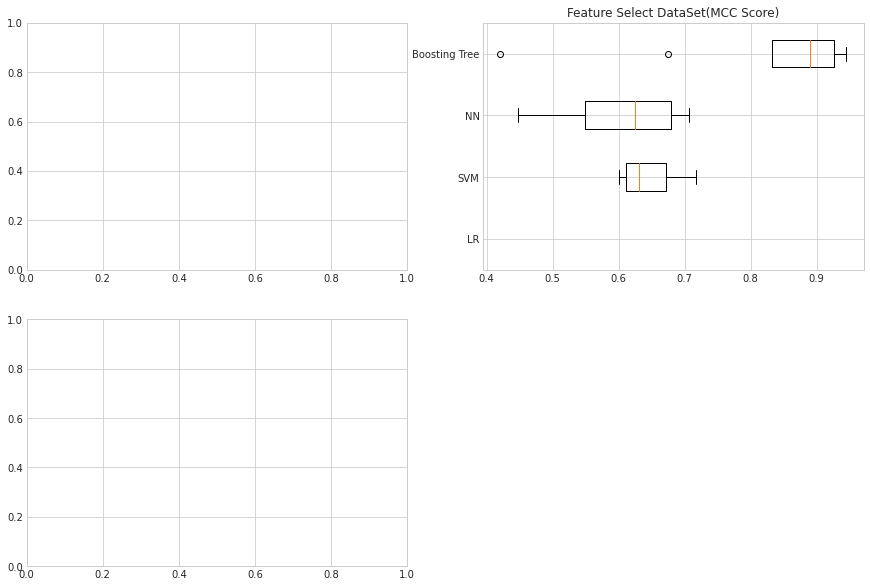

In [38]:
perf_df_lst[dataset_num] = pd.DataFrame({
    'LR': LR_cv_results_mcc,
    'SVM': svm_cv_results_mcc,
    'NN': mcc_per_fold,
    'BT': BT_cv_results_mcc
})

plt.figure(figsize=(15,10))
name_lst = ['LR', 'SVM', 'NN', 'Boosting Tree']

try:
    ax = plt.subplot(2, 2, 1)
    ax.boxplot(perf_df_lst[0].values, vert = 0)
    ax.set_yticklabels(name_lst)
    ax.set_title('Raw DataSet(MCC Score)')
except:
    pass
    
try:
    ax2 = plt.subplot(2, 2, 2)
    ax2.boxplot(perf_df_lst[1].values, vert = 0)
    ax2.set_yticklabels(name_lst)
    ax2.set_title('Feature Select DataSet(MCC Score)')
except:
    pass

try:
    ax2 = plt.subplot(2, 2, 3)
    ax2.boxplot(perf_df_lst[2].values, vert = 0)
    ax2.set_yticklabels(name_lst)
    ax2.set_title('PCA DataSet(MCC Score)')
except:
    pass

plt.show()

### Model Choosing

* **Boosting Tree** performs the best among all the models in all 3 datasets; The performances of SVM and NN are almost comparable in 3 different dataset; LR is the worst model because it is too simple for this classfication task.


* Boosting Tree have some outliers in raw datasets and feature selection datasets, which indicates this algorithm might not be stable in these datasets.

* In conclusion, in this classfication task, we could use **Feature Selection Dataset + Boosting Tree**, because 
    - 1) This combination achieve the best MCC performance. 
    - 2) Although BT might be unstable, even the lower outliers are comparable to NN and SVM.

## Final Model Performance<a name='FMT'></a>

[[190  14]
 [ 15  17]]


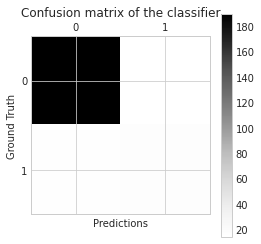

Train MCC: 0.9894020385748943
Test MCC:  0.46887717596730055
Test ACC:  0.8771186440677966
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       204
           1       0.55      0.53      0.54        32

    accuracy                           0.88       236
   macro avg       0.74      0.73      0.73       236
weighted avg       0.88      0.88      0.88       236



In [39]:
# Raw dataset + Boosting Tree
dataset_num = 1 # feature selection
dataset = all_datasets[dataset_num]

# Split train & test
x_train = dataset[:2000]
y_train = data['Response'].values[:2000]
x_test = dataset[2000:]
y_test = data['Response'].values[2000:]

# SMOTE Samples
sm = SMOTE(random_state=2)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

'''
Train & Test Model
'''
BT = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=200)  
BT.fit(x_train, y_train)
predictions = BT.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix of the classifier')
plt.xlabel("Predictions")
plt.ylabel("Ground Truth")
plt.colorbar()
plt.show()

# Classification Report
BT_MCC = matthews_corrcoef(y_test, predictions)

print('Train MCC: '+ str(matthews_corrcoef(BT.predict(x_train), y_train)))
print('Test MCC: ', str(BT_MCC))
print('Test ACC: ', accuracy_score(predictions, y_test))
print(classification_report(y_test, predictions))


### Conclusion
* The overall test accuracy of the model is **0.877**. But dive deep into the score report, the model performs quite good in recognizing negative samples(0), but not good in positive samples (precision: 0.55, recall: 0.55).


* The test MCC is **0.469**, which indicates that the model may not good at finding positive samples in test set. While we find the Train MCC is **0.98**, this result shows there might exist **overfitting problem** in the model. But the fact is even I tried a lot to simplify the model and the train MCC decreases a lot, the test mcc still can not show much improvements. This result might indicate the predictors we use in this dataset might not predict 'Response' very well.

## Unsupervised Learning Task - Customer Personality Segmentation

### Feature Engineering for Clustering Algorithm <a name=FECA></a>

In [40]:
# Inspect df_cluster
pd.DataFrame(df_cluster.nunique()).sort_values(0).rename( {0: 'Unique Values'}, axis=1)

Unique Values
Complain                         2
AcceptedCmp2                     2
AcceptedCmp1                     2
AcceptedCmp5                     2
AcceptedCmp4                     2
AcceptedCmp3                     2
Response                         2
Kidhome                          3
Teenhome                         3
Education                        4
Marital_Status                   5
NumStorePurchases               14
NumCatalogPurchases             14
NumDealsPurchases               15
NumWebPurchases                 15
NumWebVisitsMonth               16
Age                             56
Recency                        100
MntFruits                      158
MntSweetProducts               177
MntFishProducts                182
MntGoldProds                   213
MntMeatProducts                557
MntWines                       775
Income                        1971

In [41]:
# We don't need detailed marital status, intead we only care about if the customer is single or in relationship
df_cluster['Marital_Status'] = df_cluster['Marital_Status'].replace(['Widow','Divorced'],'Single')
df_cluster['Marital_Status'] = df_cluster['Marital_Status'].replace(['Married','Together'],'Relationship')
df_cluster.Marital_Status.value_counts()

Relationship    1442
Single           794
Name: Marital_Status, dtype: int64

In [42]:
# Combine 'Kidhome' and 'Teenhome' to 'Children', indicating the total num of children in home.
df_cluster['Children'] = df_cluster['Kidhome'] + df_cluster['Teenhome']

In [43]:
# Add 'MntTotal' - the total purchasing amount of all products
df_cluster['MntTotal'] = np.sum(df_cluster.filter(regex='Mnt'), axis=1)

In [44]:
# Add 'NumTotal' - the total purchasing number of different purchasing types
df_cluster['NumTotal'] = np.sum(df_cluster.filter(regex='Purchases'), axis=1)

In [45]:
# We don't care the which compaign the customer participate in; Instead, we care about the total participation times
df_cluster['TotalAccepted'] = np.sum(df_cluster.filter(regex='Accepted'),axis=1)
df_cluster.drop(columns=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2'],inplace=True)

In [46]:
# Cacluate Average of purchases per visit to the website, which can reflect the personality of the customer.
df_cluster['AvgWeb'] = round(df_cluster['NumWebPurchases'] / df_cluster['NumWebVisitsMonth'], 2)
df_cluster.fillna({'AvgWeb' : 0},inplace=True) # Handling for cases where division by 0
df_cluster.replace(np.inf, 0, inplace=True)

In [47]:
# Encoding non-numerical columns: 'Education' & 'Marital_Status'
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
for i in ['Education', 'Marital_Status']:
    df_cluster[i]=df_cluster[[i]].apply(encode.fit_transform)

In [48]:
df_cluster

Education  Marital_Status  Income  Kidhome  Teenhome  Recency  MntWines  \
0             0               1  58.138        0         0       58       635   
1             0               1  46.344        1         1       38        11   
2             0               0  71.613        0         0       26       426   
3             0               0  26.646        1         0       26        11   
4             3               0  58.293        1         0       94       173   
...         ...             ...     ...      ...       ...      ...       ...   
2235          0               0  61.223        0         1       46       709   
2236          3               0  64.014        2         1       56       406   
2237          0               1  56.981        0         0       91       908   
2238          2               0  69.245        0         1        8       428   
2239          3               0  52.869        1         1       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  ...  NumStorePurchases  \
0            88              546              172  ...                  4   
1             1                6                2  ...                  2   
2            49              127              111  ...                 10   
3             4               20               10  ...                  4   
4            43              118               46  ...                  6   
...         ...              ...              ...  ...                ...   
2235         43              182               42  ...                  4   
2236          0               30                0  ...                  5   
2237         48              217               32  ...                 13   
2238         30              214               80  ...                 10   
2239          3               61                2  ...                  4   

      NumWebVisitsMonth  Complain  Response  Age  Children  MntTotal  \
0                     7         0         1   64         0      1617   
1                     5         0         0   67         2        27   
2                     4         0         0   56         0       776   
3                     6         0         0   37         1        53   
4                     5         0         0   40         1       422   
...                 ...       ...       ...  ...       ...       ...   
2235                  5         0         0   54         1      1341   
2236                  7         0         0   75         3       444   
2237                  6         0         0   40         0      1241   
2238                  3         0         0   65         1       843   
2239                  7         0         1   67         2       172   

      NumTotal  TotalAccepted  AvgWeb  
0           25              0    1.14  
1            6              0    0.20  
2           21              0    2.00  
3            8              0    0.33  
4           19              0    1.00  
...        ...            ...     ...  
2235        18              0    1.80  
2236        22              1    1.14  
2237        19              1    0.33  
2238        23              0    2.00  
2239        11              0    0.43  

[2236 rows x 25 columns]

### Why we need feature engineering for clustering ?
1) For customer segmentation, it is better to have a more generalistic approach than diving into the finer details, because we want the number of clusters to be relatively less, and the algorithm will automatically group based on what the data is feeded. 

2) The clustering algorithm won't be able to distinguish or categorize related records into groups, like we have done - segment people into Single or in a Relationship, or sum up all the amount of purchasing goods.

3) Some interesting ratios, like 'AvgWeb', is not easy to extract for algorithms. So it is better to predefine some ratios that might reflect the personalities of customers.

### K-Means <a name=Kmeans></a>

In [49]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Get cluster data
cluster_data = df_cluster.values

# Standardize data
std_scale = preprocessing.StandardScaler().fit(cluster_data)
cluster_data = std_scale.transform(cluster_data)

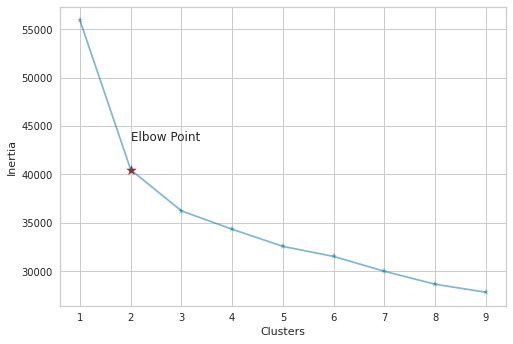

In [50]:
# Determine K using Inertia_
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans.fit(cluster_data)
    inertia.append(kmeans.inertia_)
    
elbow = 2
plt.plot(range(1, 10), inertia, marker = '*', alpha=0.5)
plt.scatter(elbow, inertia[elbow-1], s=100, c='r', marker='*')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.annotate('Elbow Point' ,(elbow, inertia[elbow-1]), xytext=(elbow,inertia[elbow-1] + 3000))
plt.show()

Mean K:  6.75


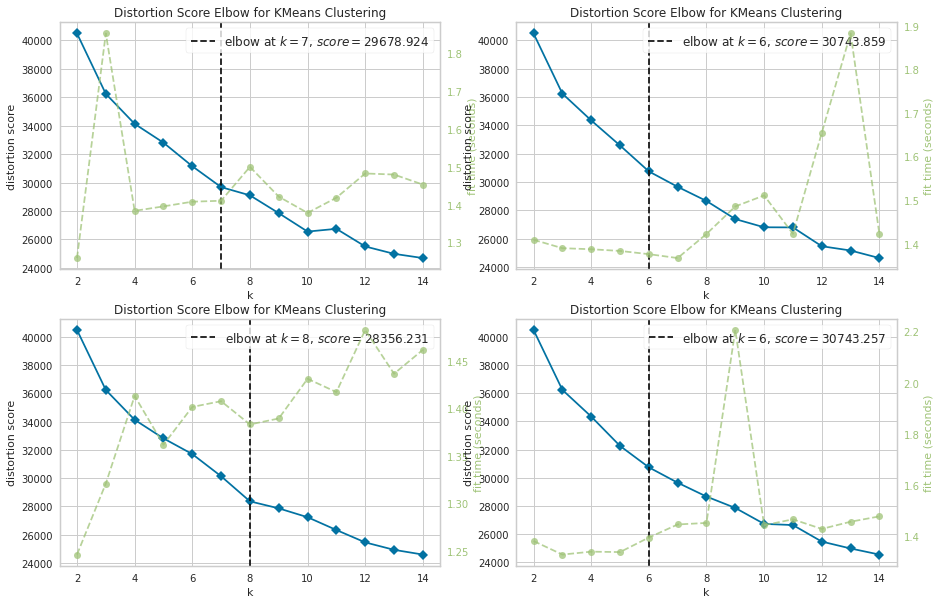

In [51]:
# Instantiate the clustering model and visualizer
model = KMeans(init = 'k-means++')
k_lst = []

# perform K-means 4 times(different intial clusters)
plt.figure(figsize=(15,10))
plt.subplot(221)
visualizer = KElbowVisualizer(model, k=(2,15), metric='distortion')
visualizer.fit(cluster_data)        # Fit the data to the visualizer
visualizer.finalize()
k_lst.append(visualizer.elbow_value_)

plt.subplot(222)
visualizer = KElbowVisualizer(model, k=(2,15), metric='distortion')
visualizer.fit(cluster_data)        # Fit the data to the visualizer
visualizer.finalize()
k_lst.append(visualizer.elbow_value_)

plt.subplot(223)
visualizer = KElbowVisualizer(model, k=(2,15), metric='distortion')
visualizer.fit(cluster_data)        # Fit the data to the visualizer
visualizer.finalize()
k_lst.append(visualizer.elbow_value_)

plt.subplot(224)
visualizer = KElbowVisualizer(model, k=(2,15), metric='distortion')
visualizer.fit(cluster_data)        # Fit the data to the visualizer
visualizer.finalize()
k_lst.append(visualizer.elbow_value_)

print('Mean K: ', np.mean(k_lst))

### Different Scoring Metrics for K-means

* The above scoring parameter metric is set to **distortion**, which computes the sum of squared distances from each point to its assigned center. 

* The **silhouette** score calculates the mean Silhouette Coefficient of all samples, while the **calinski_harabasz** score computes the ratio of dispersion between and within clusters. I also use these 2 metrics to get clusters.

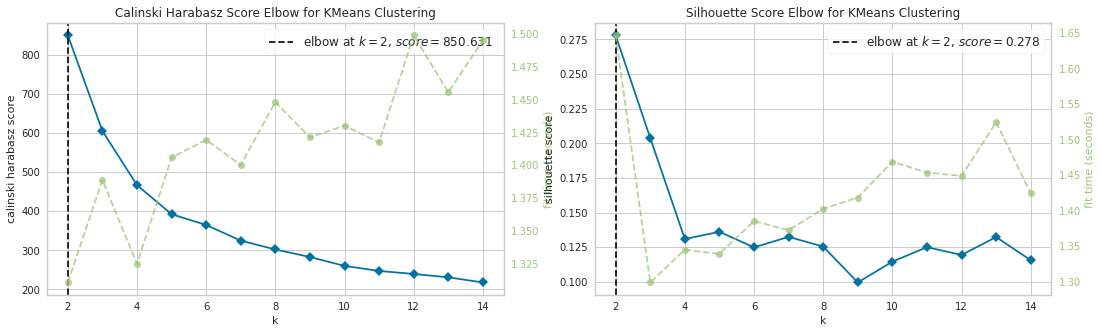

In [52]:
# Calinski_harabasz Scoring Matrix
plt.figure(figsize=(18,5))

plt.subplot(121)
visualizer = KElbowVisualizer(model, k=(2,15), metric='calinski_harabasz')
visualizer.fit(cluster_data)        # Fit the data to the visualizer
visualizer.finalize()

# Silhouette Scoring Matrix
plt.subplot(122)
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette')
visualizer.fit(cluster_data)        # Fit the data to the visualizer
visualizer.finalize()
plt.show()

### Choosing K value

* When we use inertia, Calinski_harabasz scorer and Silhouette scorer, we all get elbow point at K=2; 

* While Distortion scorer says that K=7, we could see distortion scores come at eblow point at about 3. 

* Considering all the clutering results, I finally choose **K=2** to cluster the customers. 

In [53]:
# Building & Fitting K-Means Models
kmeans = KMeans(n_clusters=2, init = 'k-means++').fit(cluster_data)
pred = kmeans.predict(cluster_data)
df_cluster['Cluster'] = pred + 1

In [54]:
# Inspect the cluter nums
df_cluster["Cluster"].value_counts()

2    1306
1     930
Name: Cluster, dtype: int64

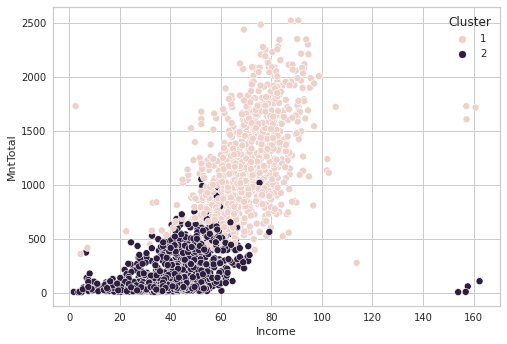

In [55]:
# We could see the the clear difference between the 2 cluster (A.T Income and MntTotal)
sns.scatterplot(x='Income',y='MntTotal',hue='Cluster',data=df_cluster)
plt.show()

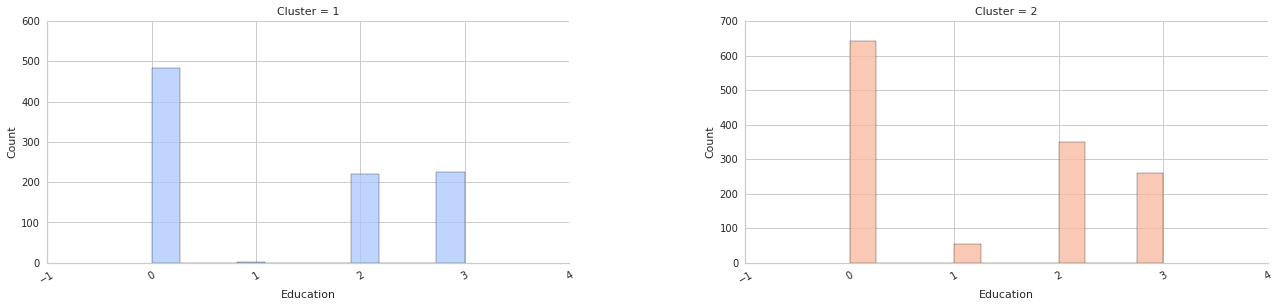

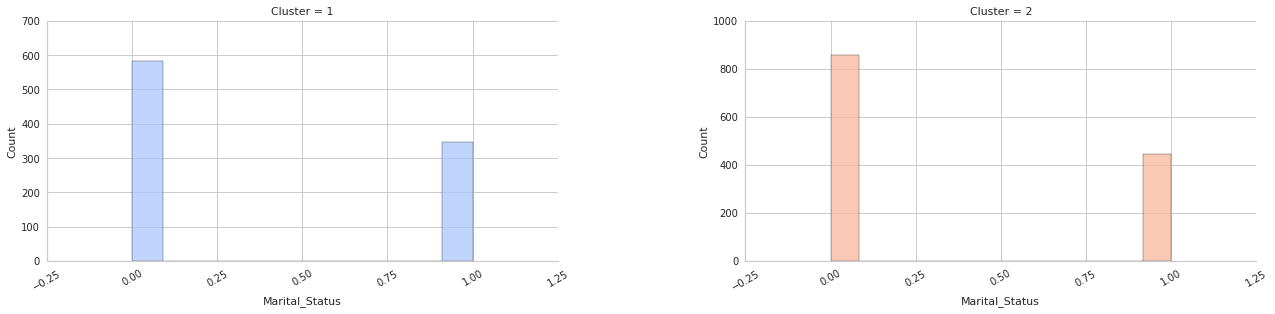

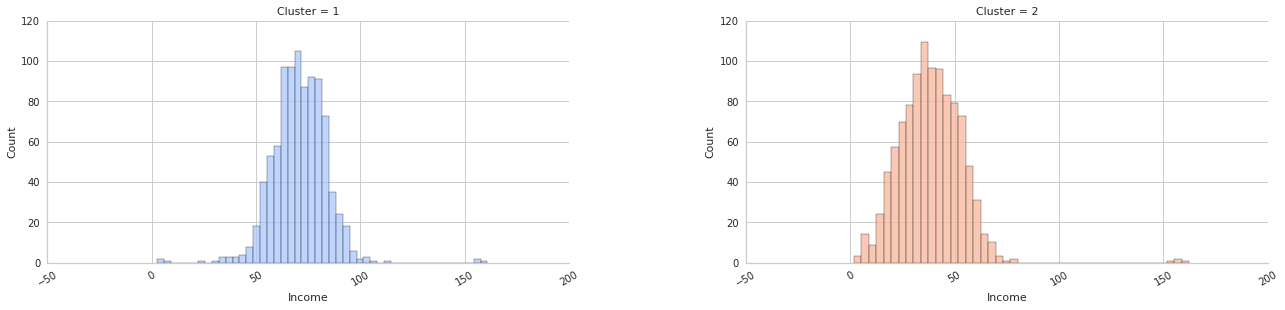

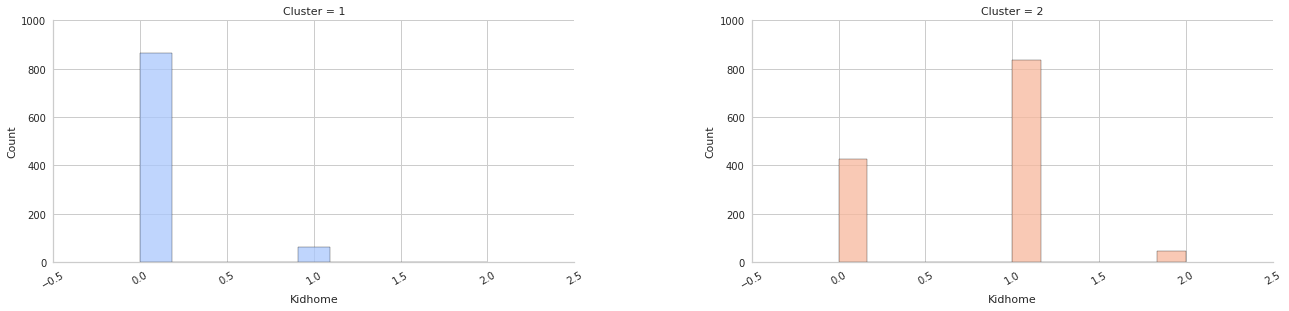

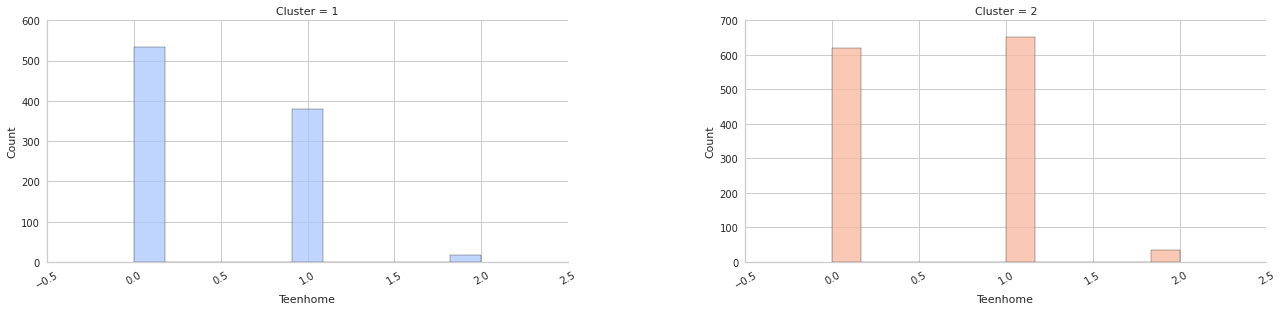

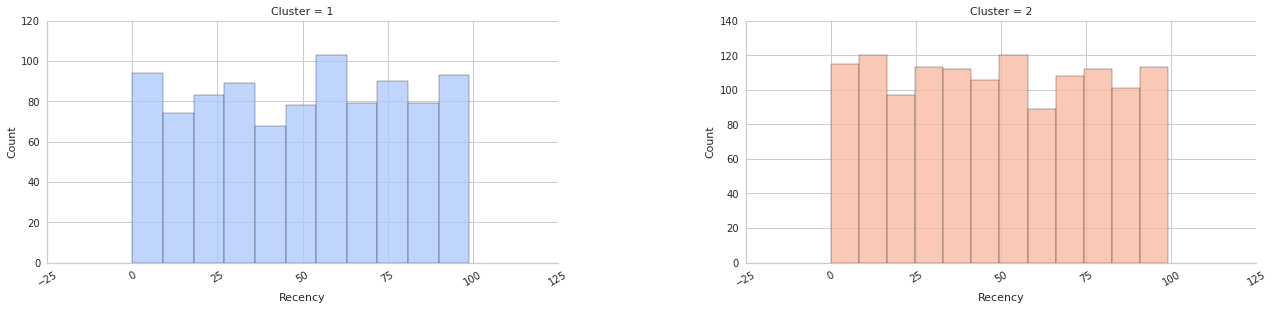

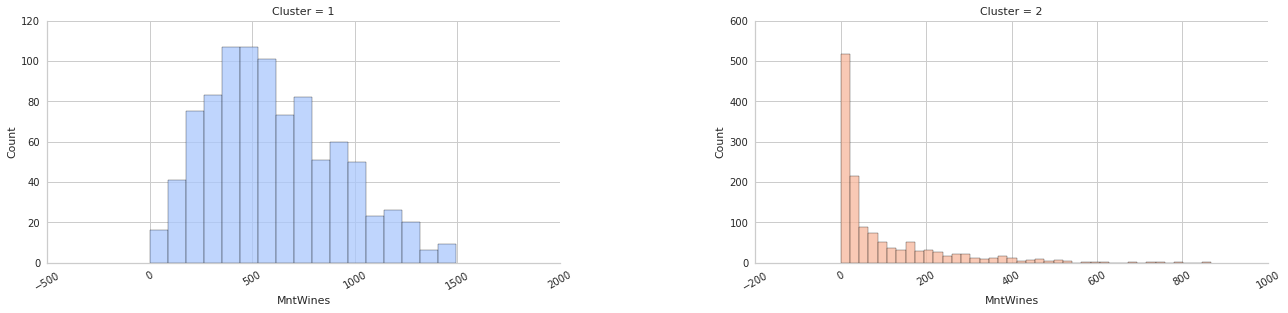

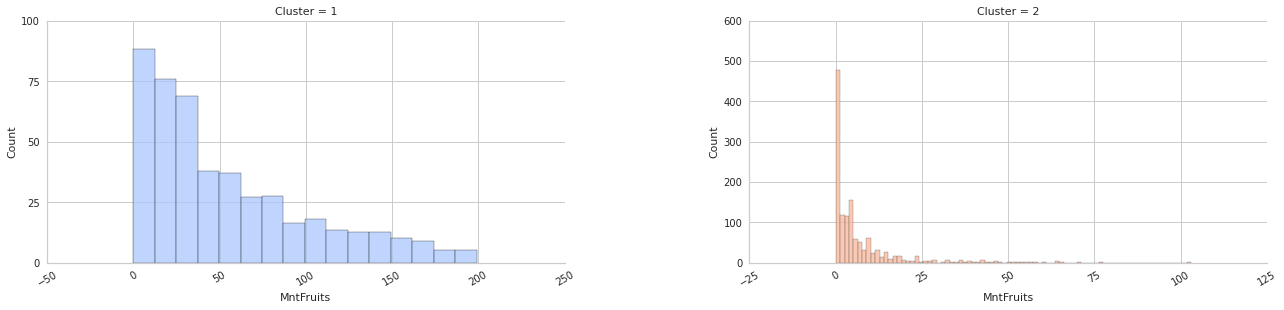

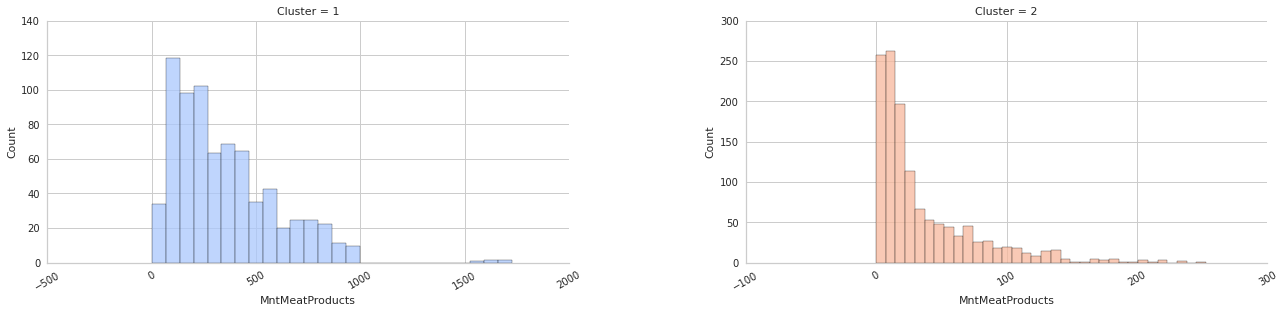

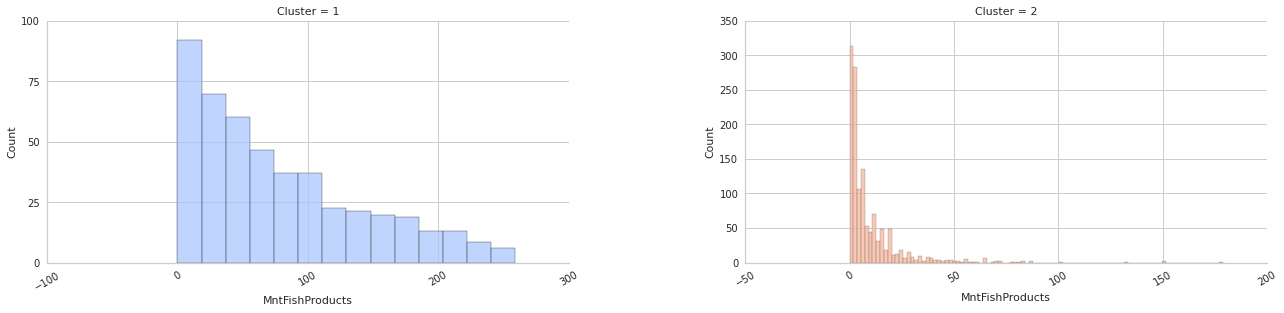

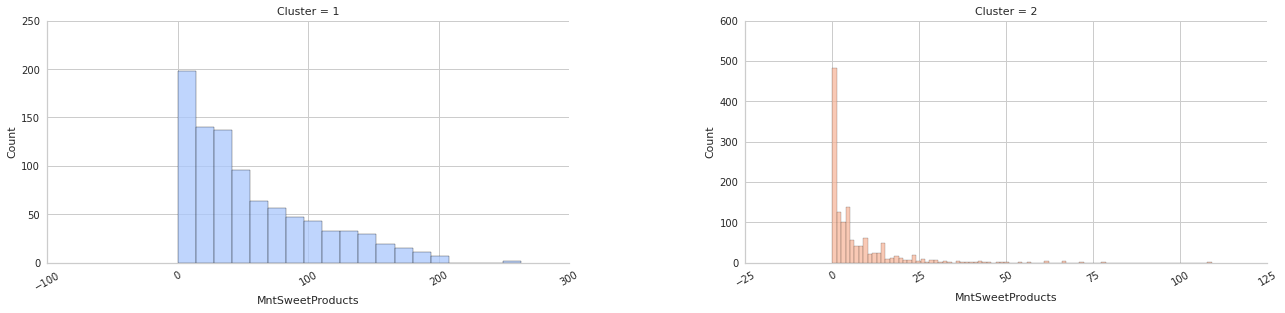

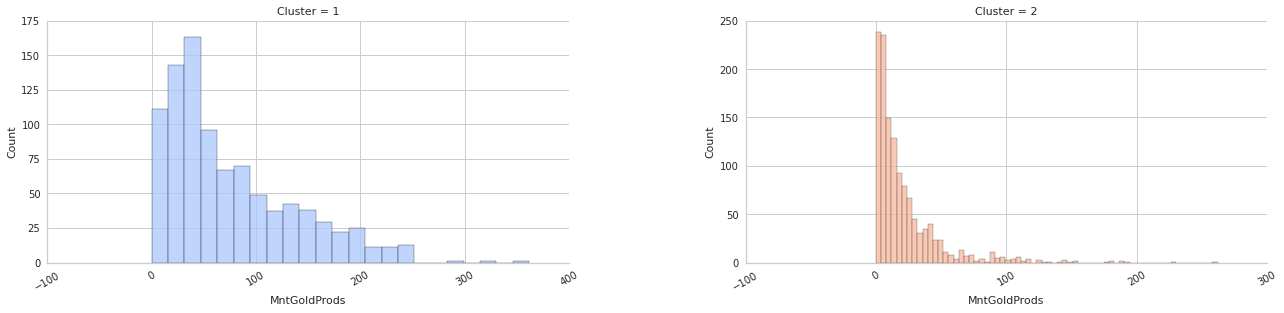

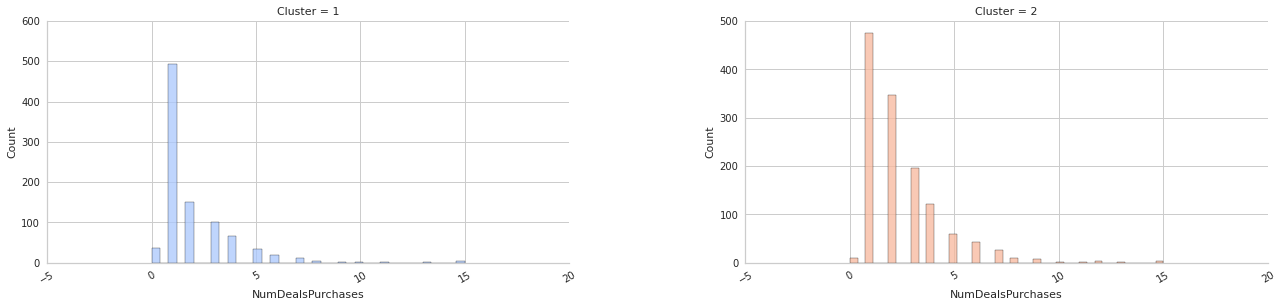

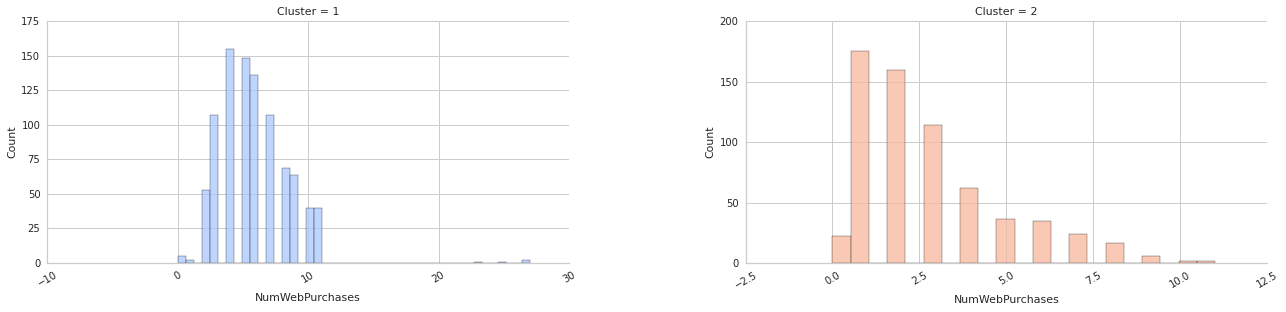

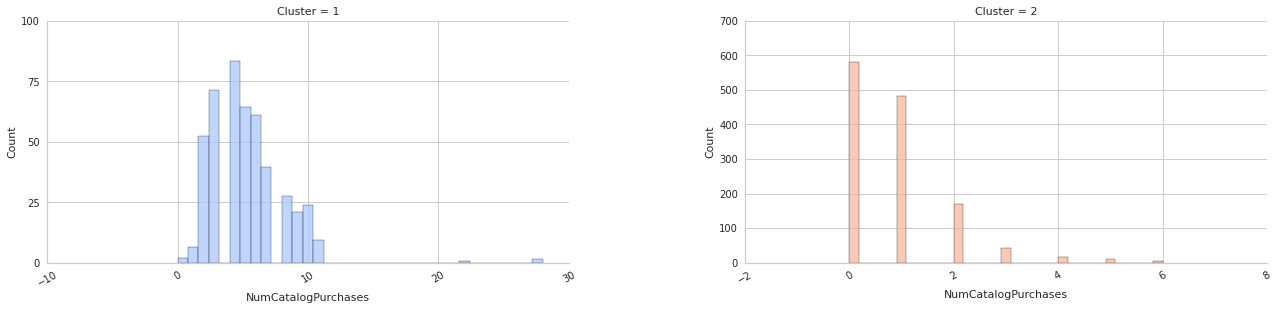

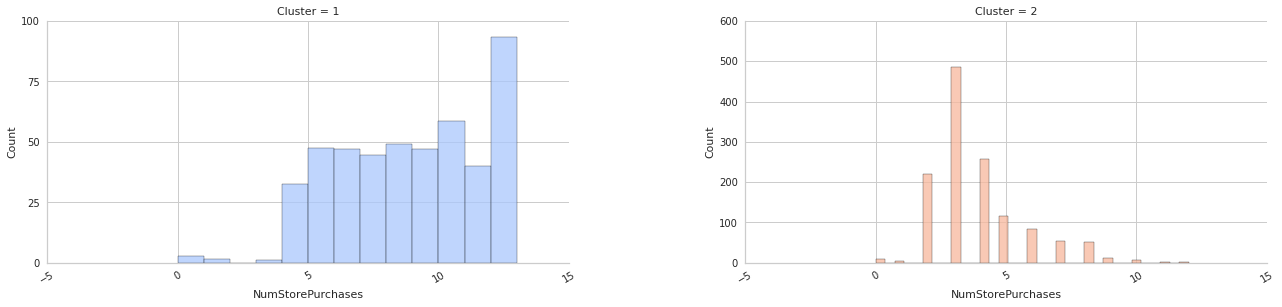

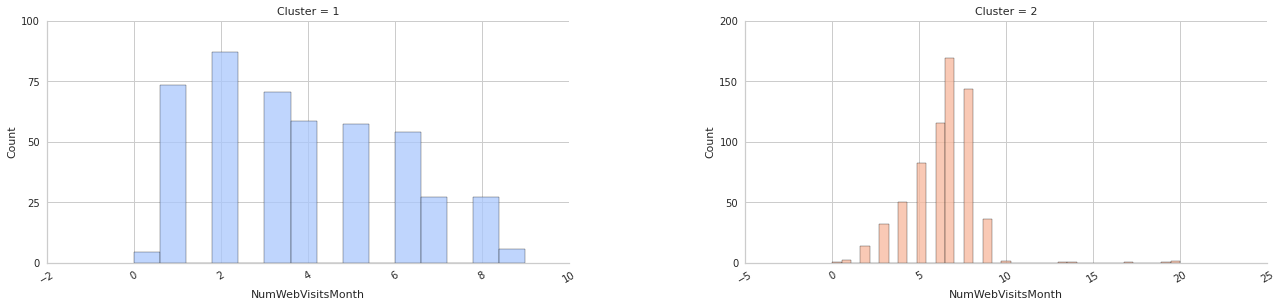

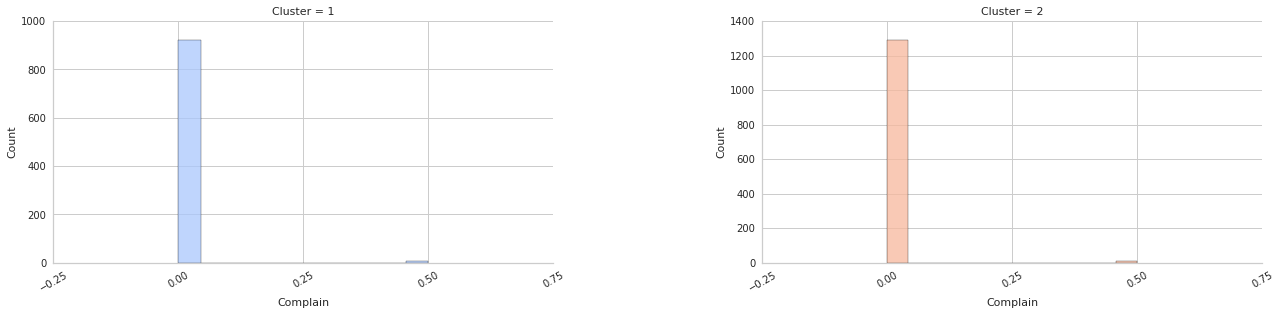

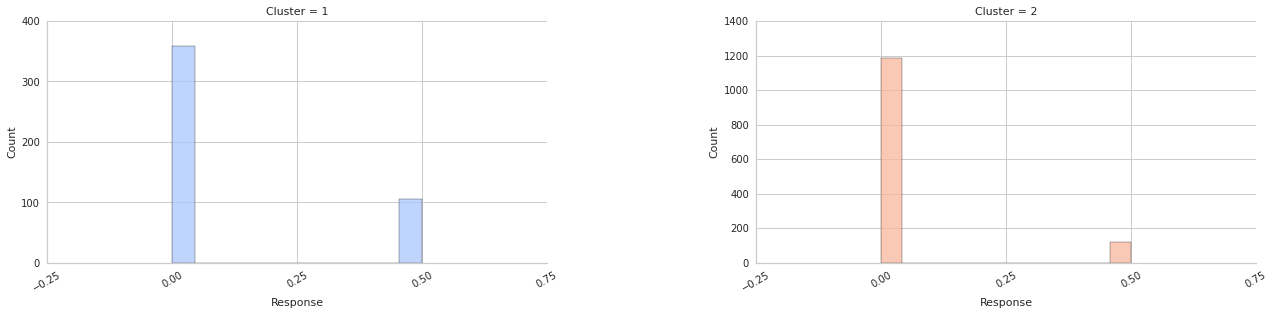

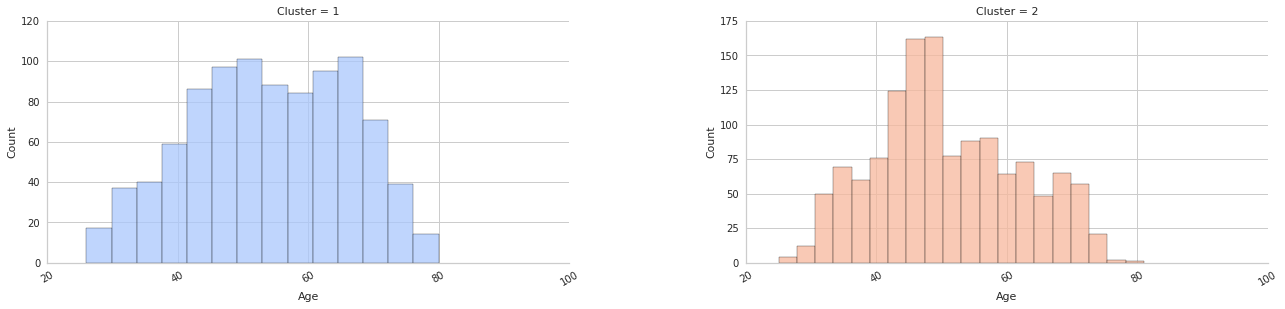

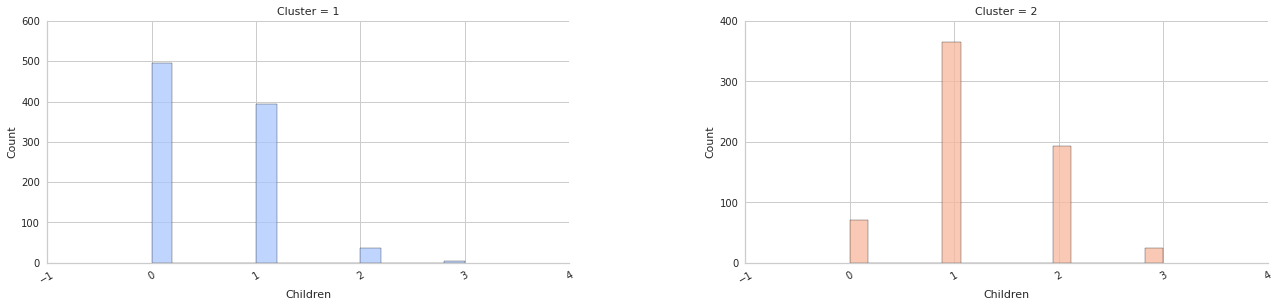

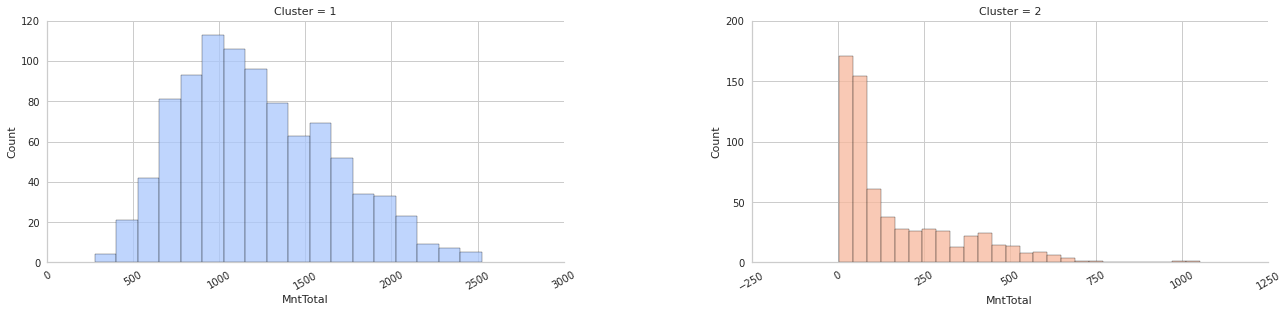

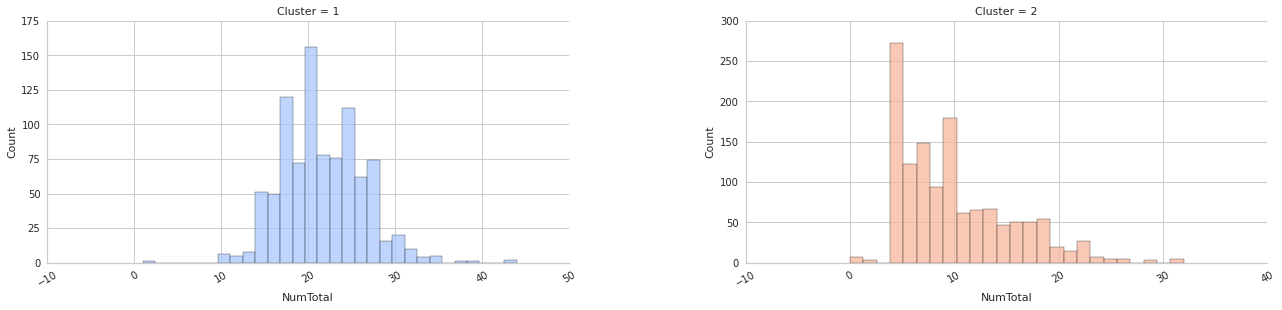

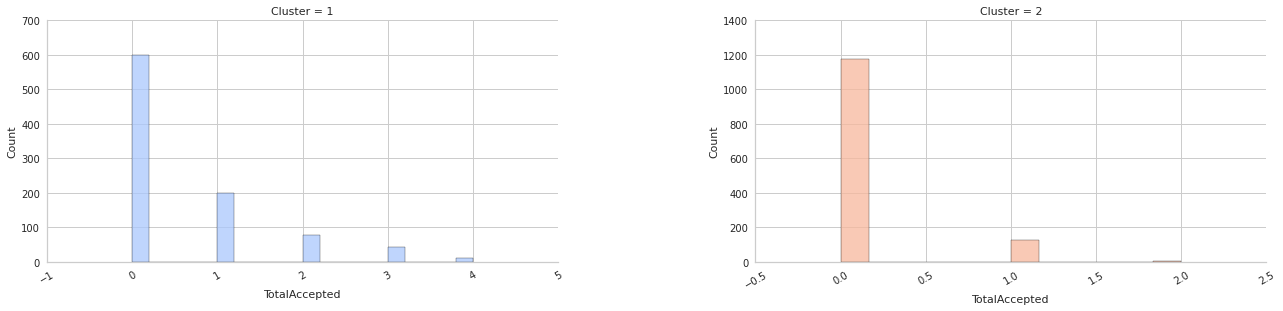

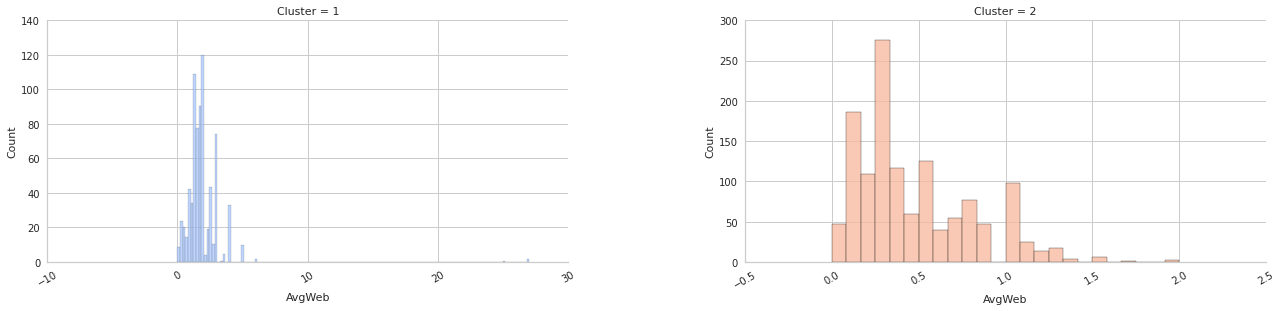

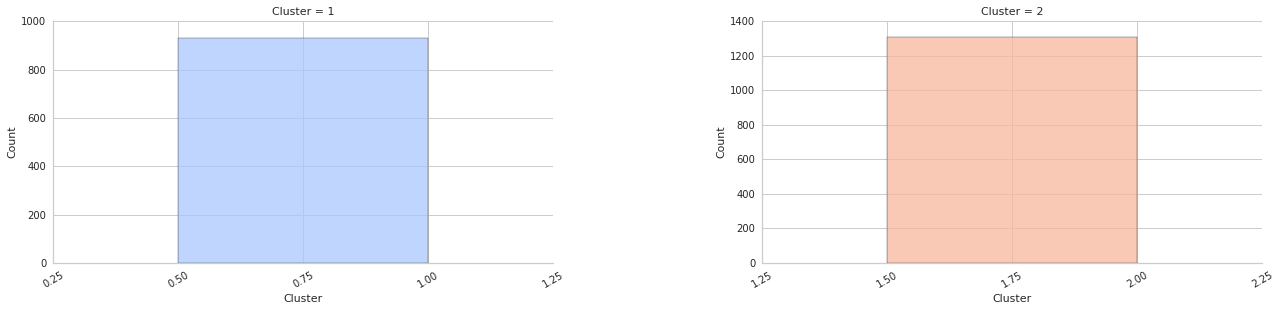

In [56]:
# For every columns in dataset
for i in df_cluster:
    g = sns.FacetGrid(df_cluster, col = "Cluster", hue = "Cluster", palette = "coolwarm", sharey=False, sharex=False)
    g.map(sns.histplot,i) 
    
    g.set_xticklabels(rotation=30)
    g.set_yticklabels()
    g.fig.set_figheight(5)
    g.fig.set_figwidth(20)

## Observations
* The **income level** of this 2 groups shows clear difference. Cluster 1 have obvious higher income than Cluster 2.


* Cluster 1 have less **kids**(as well as less children) at home. Most of them have no kids and only a few(about 5%) have 1 kids; While most customers in cluster 2 have 1 kid, and some have 2 kids.


* Cluster 1 customers buy much more amount products than cluster 2 customers. Almost every products shows the same trend. This result indicates that people in cluster 1 have more **consumption power**, and they are more likely to purchase goods from the company. The **total number of accepting offers** in compaigns is also consistent with my conclusion. The group with more consumption power(cluster 1) accept more offers than the other.


* Also, people in cluster 1 have much more **purchasing numbers** in different place. Among all these places, they may prefer to buy products in **real store**. It is not surprising since most of our customers are in their middle age or old age.


* The last small obervation is that cluster 2 have some **extreme situations in product purchasing amount**. Some customer in cluster 2 purchasing unusual amount of products. One plausible assumption is that they might buy a lot of goods for special festivals or parties. Checking their purchasing date may verify this assumption.

## Gaussian Mixture Model<a name=GMM></a>

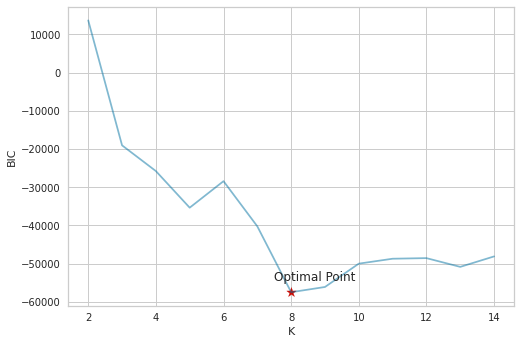

In [57]:
from sklearn.mixture import GaussianMixture

log_like_lst = []
all_cluster = 15

for k in range(2, all_cluster):
    gmm = GaussianMixture(n_components = k, random_state = 100).fit(cluster_data)
    log_like = gmm.bic(cluster_data)
    log_like_lst.append(log_like)

elbow = 8
plt.plot(range(2, all_cluster), log_like_lst, alpha=0.5)
plt.scatter(elbow, log_like_lst[elbow-2], s=100, c='r', marker='*')
plt.ylabel('BIC')
plt.xlabel('K')
plt.annotate('Optimal Point' ,(elbow, log_like_lst[elbow-1]), xytext=(elbow - 0.5,log_like_lst[elbow-2] + 3000))
plt.show()

* GMM is a soft version of K-means, calculating the sample probability to different clusters. It is also a good clustering algorithm.


* Here, we use **BIC** to evluate the effectiveness of clustering. When **K=8**, the BIC score comes to the balanced point (will not show much improvement when increasing K), so we choose 8 as the final clustering result.

In [58]:
# Building & Fitting GMM Models
gmm = GaussianMixture(n_components = 8, random_state = 100).fit(cluster_data)
labels = gmm.predict(cluster_data)

df_cluster['Cluster_GMM'] = labels + 1

In [59]:
# Inspect the cluter nums
df_cluster["Cluster_GMM"].value_counts()

4    691
2    448
5    395
3    291
6    251
8    103
1     33
7     24
Name: Cluster_GMM, dtype: int64

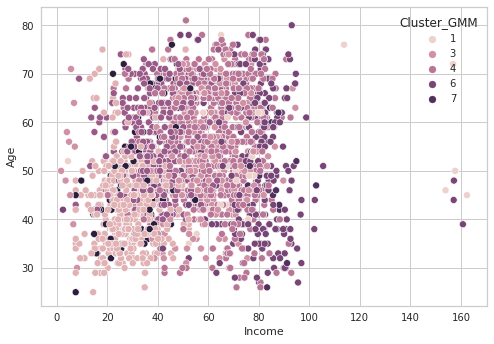

In [60]:
# Inspect the cluster difference (By Income & Age)
sns.scatterplot(x='Income',y='Age',hue='Cluster_GMM',data=df_cluster)
plt.show()

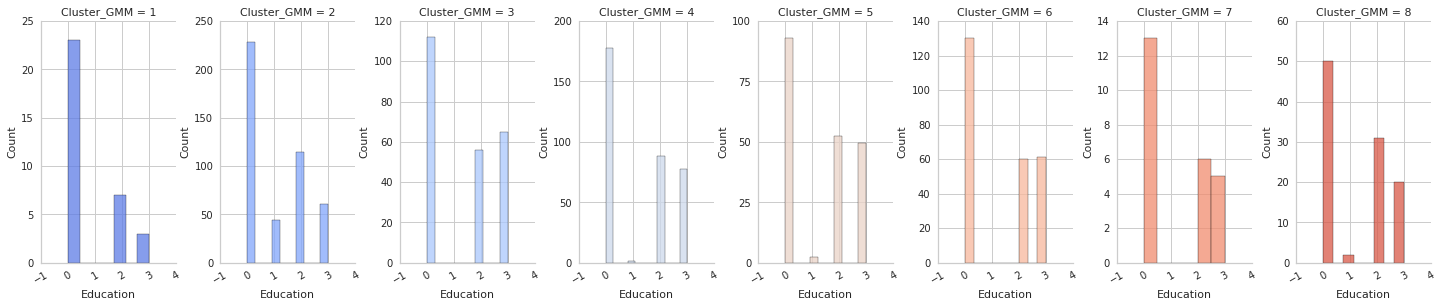

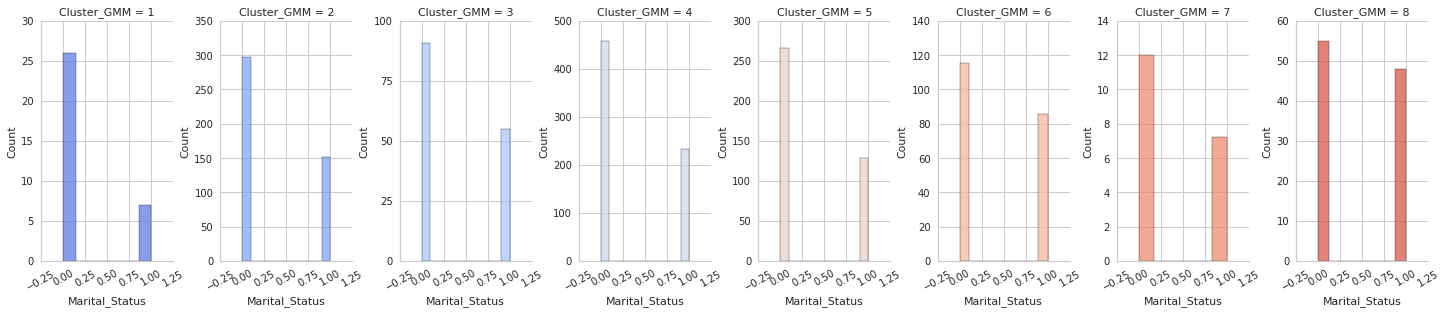

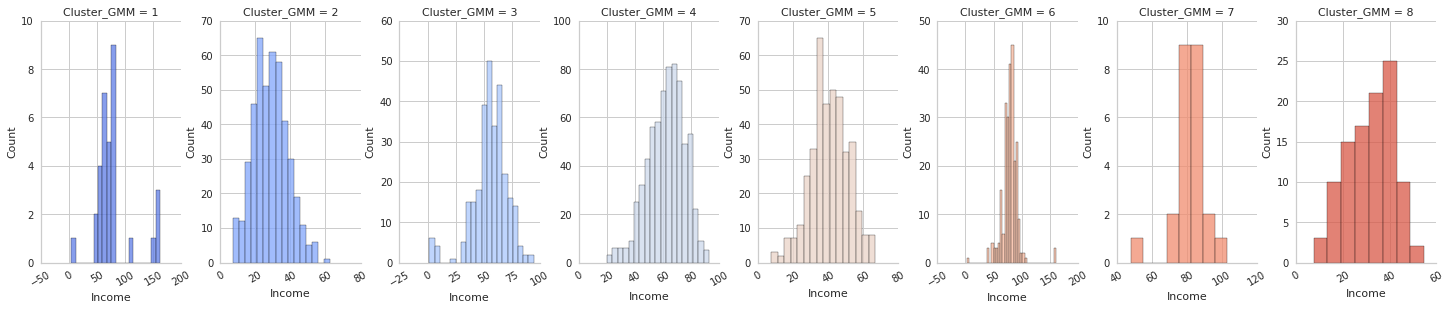

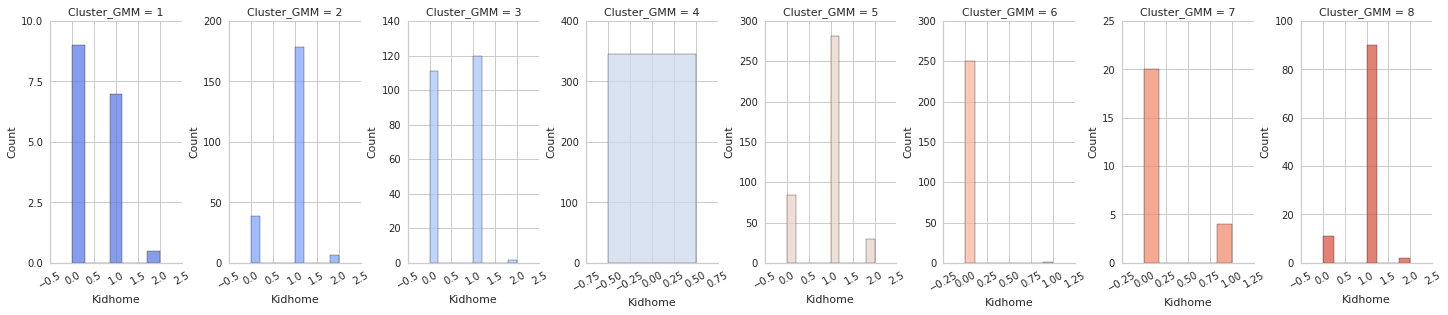

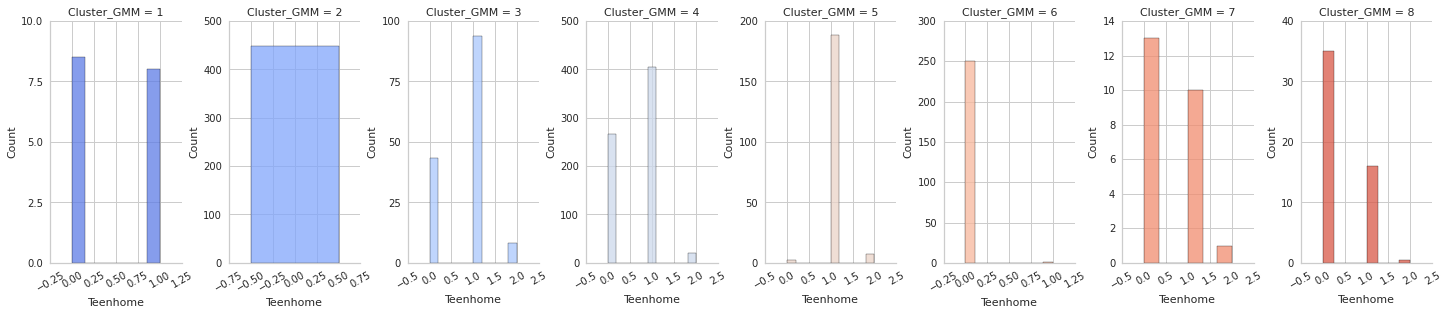

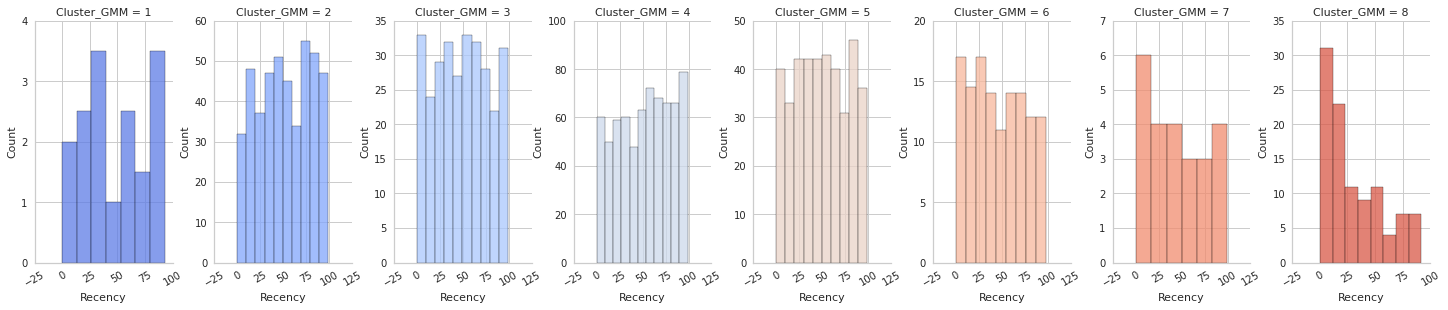

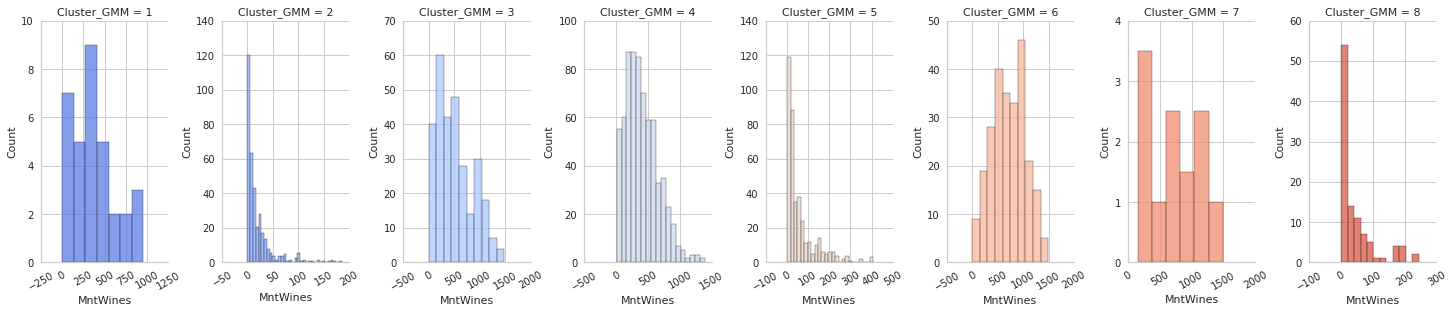

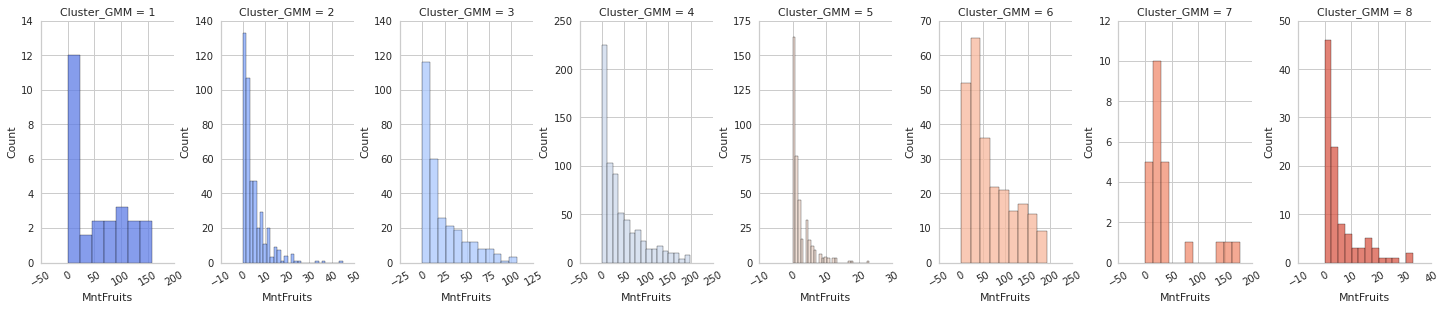

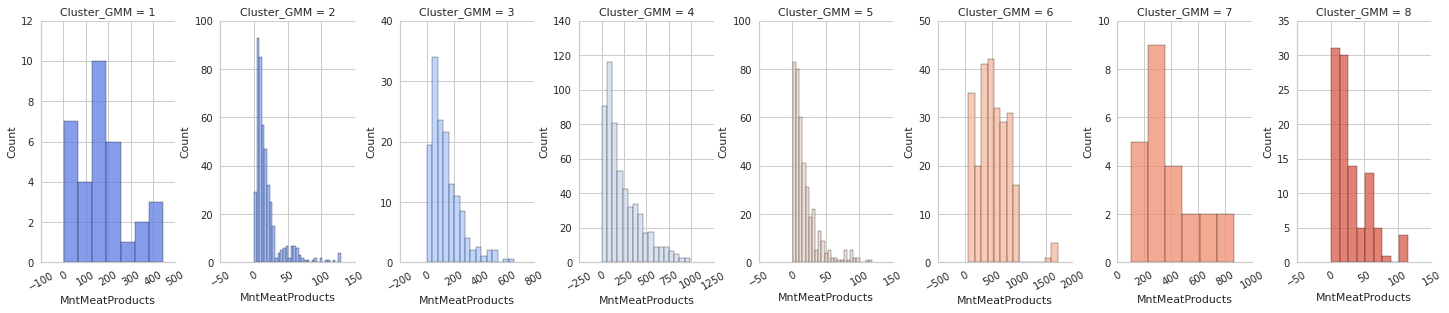

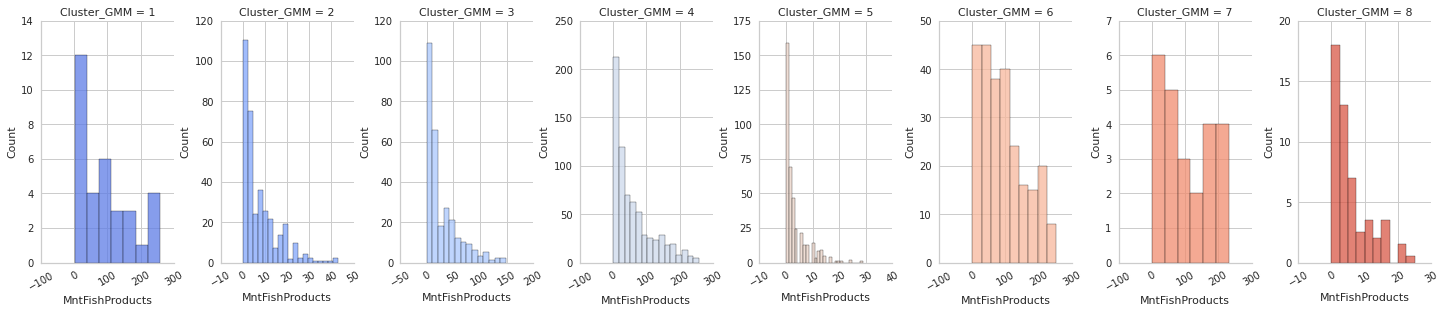

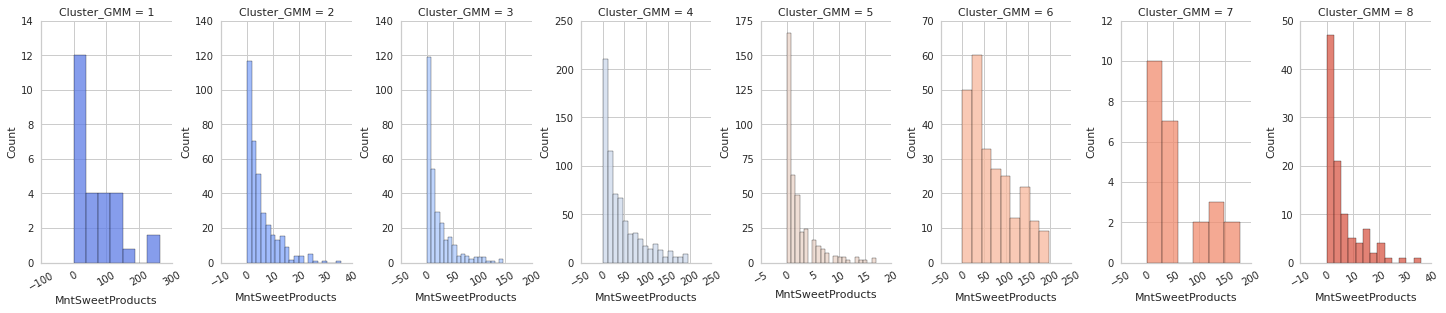

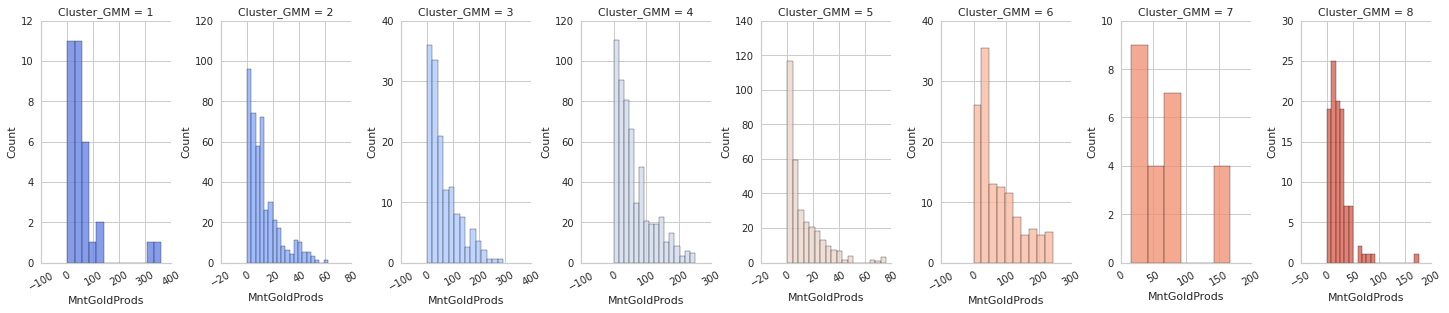

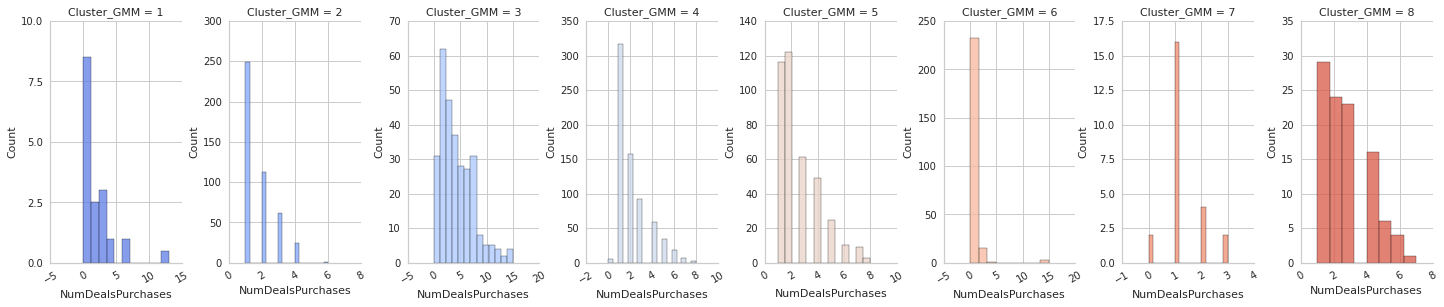

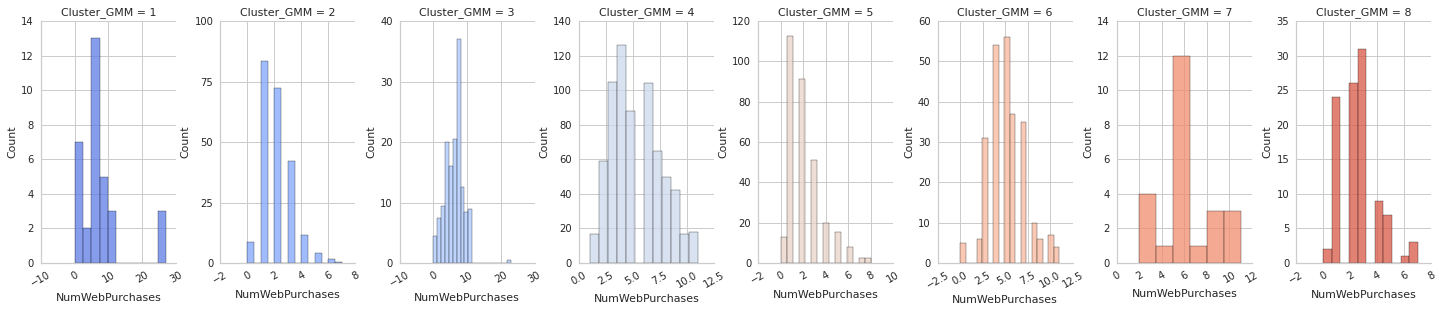

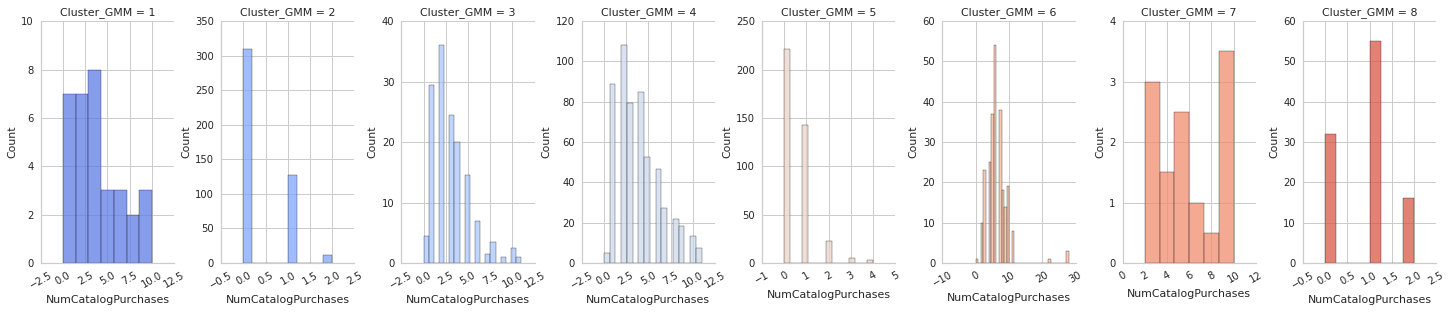

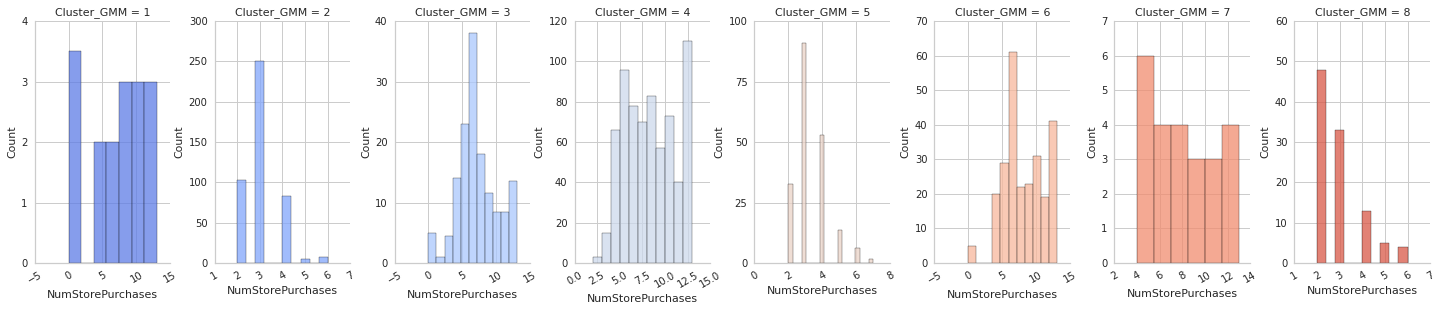

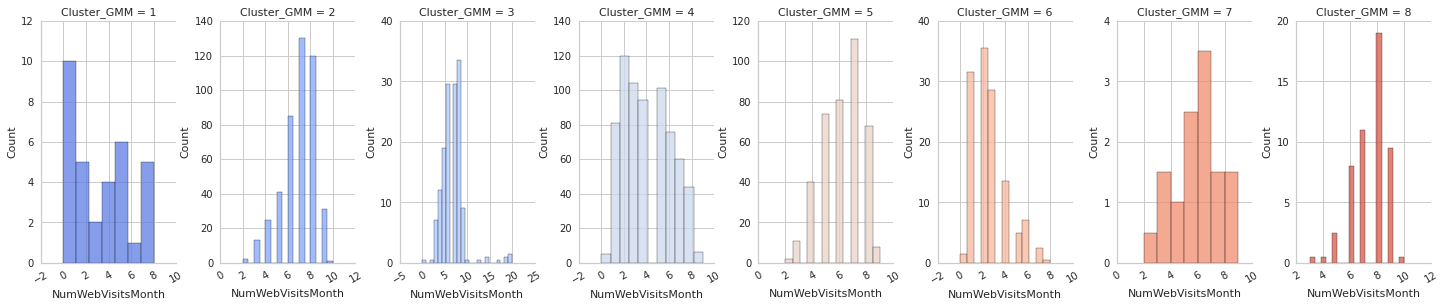

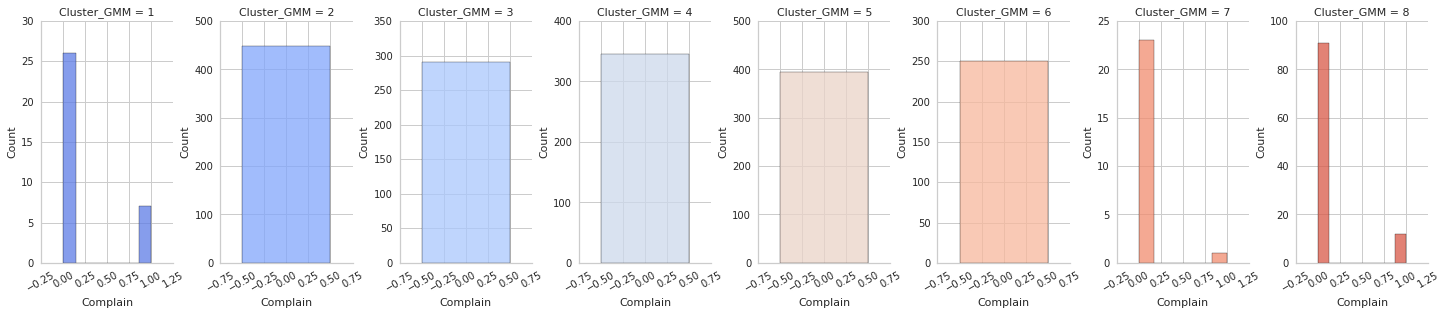

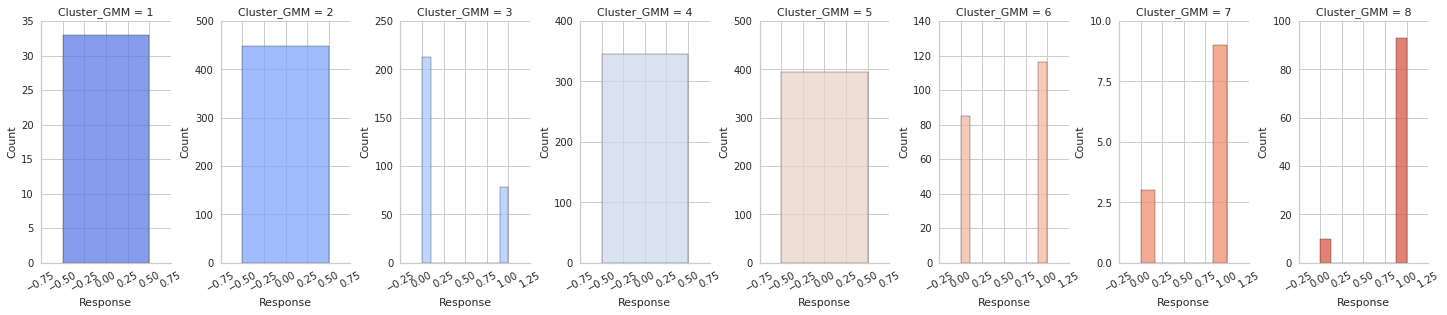

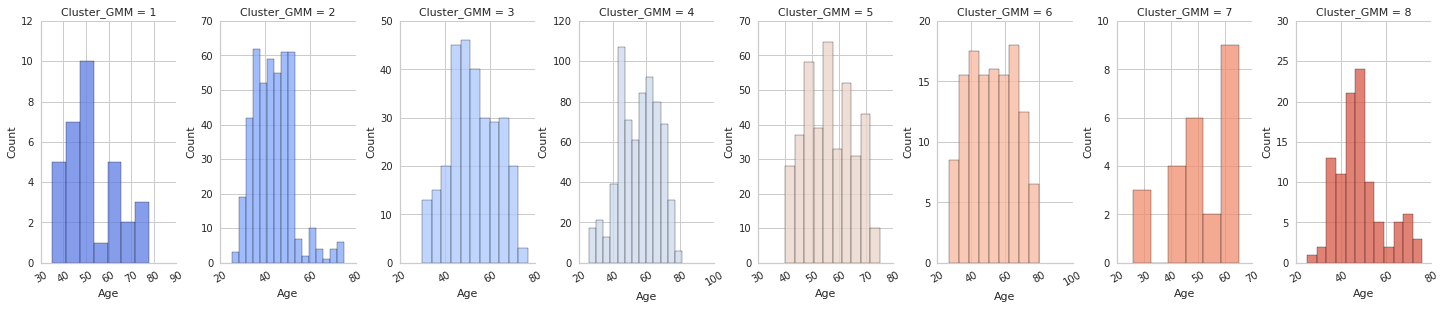

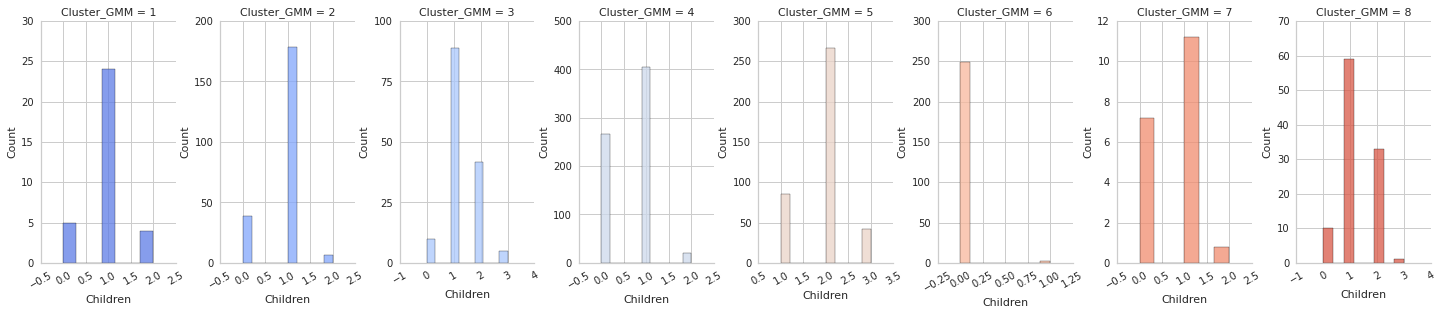

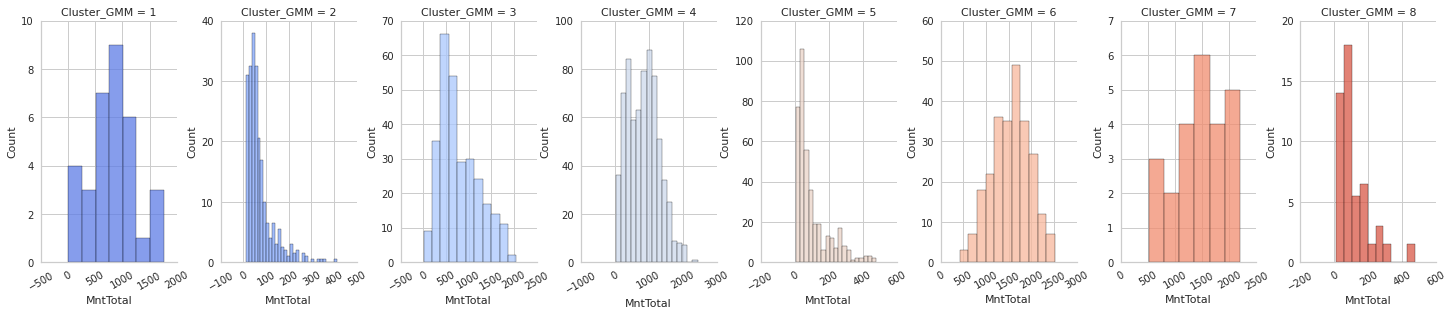

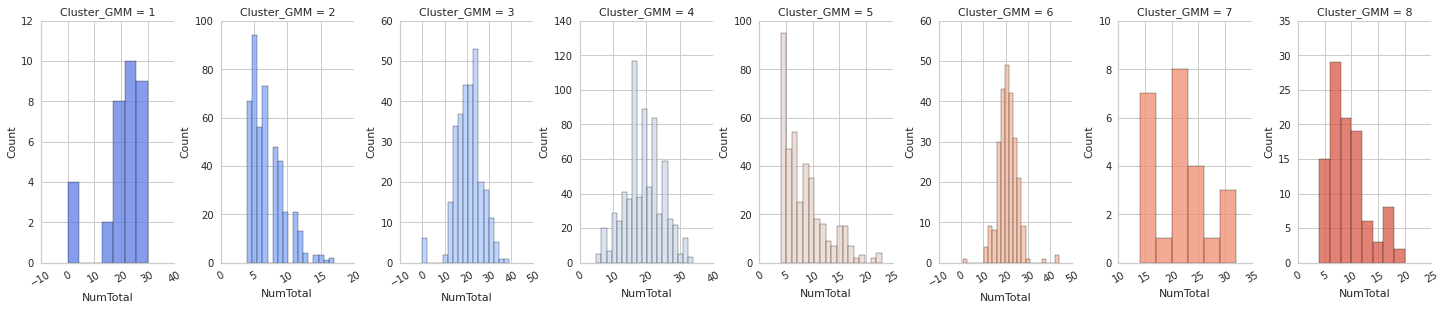

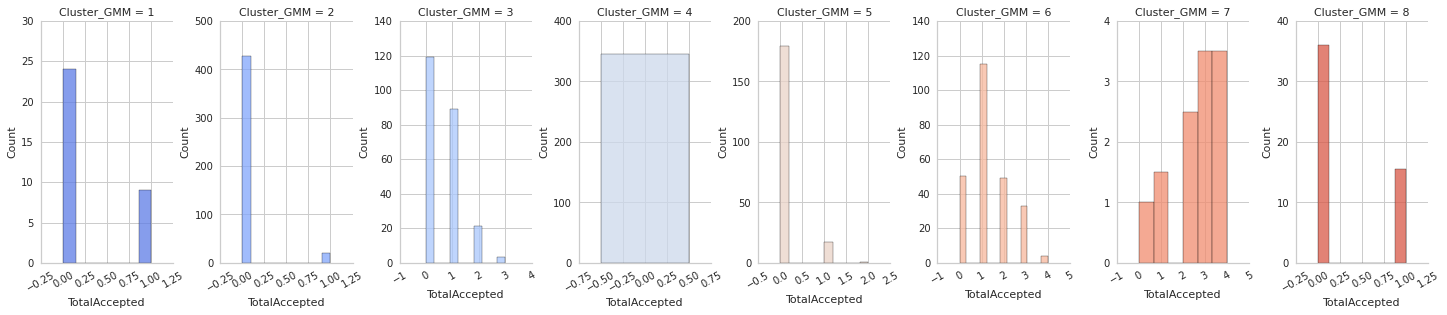

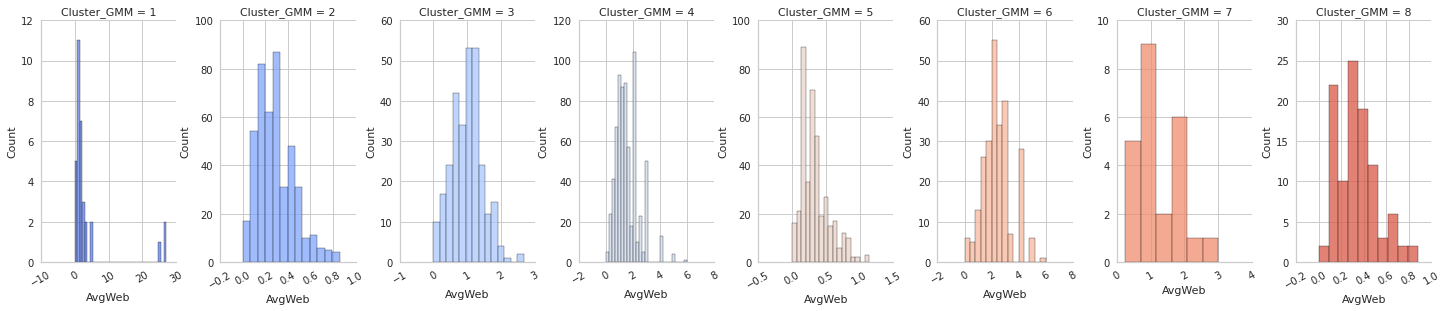

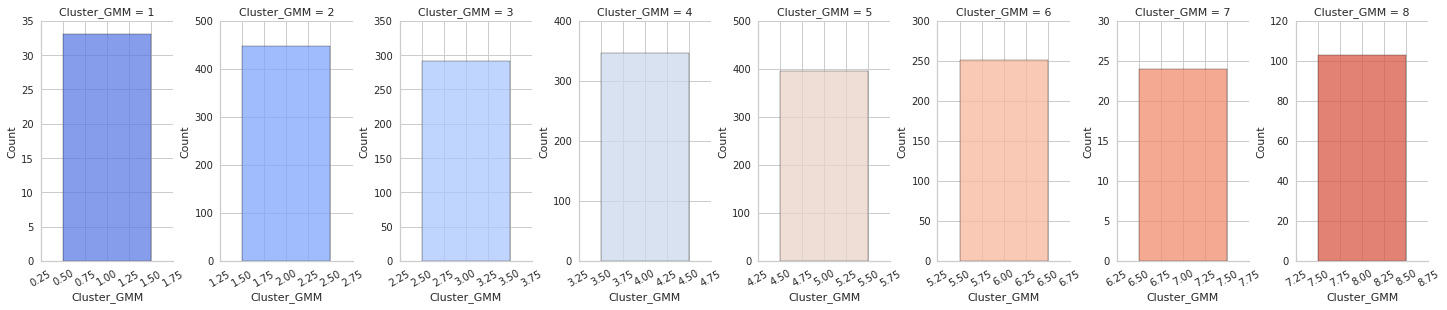

In [61]:
# For every columns in dataset
for i in df_cluster:
    if i == 'Cluster':
        continue
    g = sns.FacetGrid(df_cluster, col = "Cluster_GMM", hue = "Cluster_GMM", palette = "coolwarm", sharey=False, sharex=False)
    g.map(sns.histplot,i) 
    g.set_xticklabels(rotation=30)
    g.set_yticklabels()
    g.fig.set_figheight(5)
    g.fig.set_figwidth(20)
    

## Observations
* There are 8 different clusters, which is difficult to describe, but we could see clear difference in their basic information, family condition and consumption power ...
